
#  FBI Gun Data (NICS data) in combination with US census data to explore  
#  socioeconomic questions related to US gun sales

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### FBI Gun Data (NICS data)
>The original Gun data file was in Excel format. I loaded it into a spreadsheet and saved it as a csv file for investigation in this notebook. There are a few caveats with regard to infering gun sales from the NICS data (https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md): There is no one to one correlation between background checks and firearm sales. In order to convert NICS data to estimated sales the following modification to the data will be made. Each long gun and handgun check will be counted as 1.1 sales, each multiple gun check as 2 sales. Furthermore the total number of background checks will be adjusted times 1.66 as Harvard researchers found that 40% of gun buyers acquired their recent handgun without a background check.

#### US census data
>This data set has a huge number of variables. The consideration of all of them would be beyond the scope of this project. Therefore, I will choose only a small number to be investigated in this project. The US census data have a different structure than the NICS data. Moreover, the different time frames considered have to be taken into account upon analysis in combination with the NICS data.

#### What I want to explore in this data set
> As a European with no experience in having an enormous amount of guns owned by citizens I realize that US citizens seem to see owning a gun as an innate right. At least a majority seems to think like that. Despite that fact there seem to be differences in using this right throughout the US. In order to better understand which socioeconomic factors might be associated with this varying behaviour I will explore the questions stated below. This sample of questions is very subjective because I chose the independent variables for which the questions are formulated out of many based on my personal interests. Moreover, there will be no statistical evaluation for causation but only for correlation between variables.

> As the dependent variable I will choose gun sales per capita so that a normalized number of gun sales can be used for comparison between states i.e. the differences in inhabitants are factored in. 

#### Questions

    1)  What kind of distributions do the data show?
    2)  Which US census data from my selection (independent variables) are correlated with gun sales per capita (   
        dependent variable).
    3)  Which state had the highest gun sales per capita in 2016? Which one the lowest?
    4)  Trend of gun sales between 2010 und 2016. Differences between states?
    5)  Are gun sales per capita associated with the proportion of female persons in a state. Comparison between 
        2010 and 2016. 
    6)  Are gun sales per capita associated with the proportion of veterans in a state.2011-2015 data
    7)  Are gun sales associated with the proportion of foreign born persons. 2011-2015 data
    8)  Are gun sales associated with the proportion of owner occupied housing unit rate. 2011-2015 data
    9)  Are gun sales associated with education. High scool graduate or higher. 2011-2015 data
    10) Are gun sales associated with wealth. Median household income/Per capita income/Persons in poverty. 
        2011-2015 data
     


**Note**
> First of all I will import the packages needed for the investigation

In [1]:
# import packages for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

**Note NICS Data**
> Start data wrangling with NICS data

In [2]:
# load NICS data
df_gun = pd.read_csv('gun_data.csv', delimiter=';')

In [3]:
# inspect data 1 
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# check if totals correspond to sum of single columns
df_gun.iloc[4, 2:26].sum()

123506.0

In [5]:
# inspect data 2
df_gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


**Note NICS Data**
> NaN values in data columns with numbers. Must be removed for statistical evaluation

In [6]:
# another check for the above, basis check for comparison after cleaning
print(df_gun.isnull().values.any())

True


In [7]:
# inspect data 3
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [8]:
# is object data type string as expected
type(df_gun['month'][0])

str

**Note NICS Data**
> I am interested in years not in month. This data column has to be modified for the purposes I want to explore.

In [9]:
# inspect data 4
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


**Note NICS Data**
> Distribution looks like there are a lot of data points without real numbers. Recheck after data cleaning. Only data from years in scope of this analysis (2010-2016) relevant.

In [10]:
# check for duplications
sum(df_gun.duplicated())

0

In [11]:
# are all states contained in the NICs data
df_gun['state'].nunique()

55

In [12]:
# why 55 states
df_gun['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

**Note NICS Data**
> After exploring the NICS dataset there are several to dos in order to clean it: Remove NaN values, install a year instead of a month column, extract only the years relevant for my analysis(2010,2016,2011-2015), compare if US census data contain the same states as the NICS data.

**Note US Census Data**
> Start data wrangling with US Census data

In [13]:
# load census data
df_cen = pd.read_csv('census.csv')

In [14]:
# inspect data 1
df_cen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


**Note US Census Data**
> NaN values have to be removed for statistical evaluation. DataFrame has to be reshaped in order to match NICS data.

In [15]:
# inspect data 2
df_cen.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note US Census Data**
> NaN values in data columns with numbers. Must be removed for statistical evaluation

In [16]:
# another check for the above, basic check for comparison after data cleaning
print(df_cen.isnull().values.any())

True


In [17]:
# inspect data 3
df_cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

**Note US Census Data**
> No further exploration of original census data but reshaping census DataFrame and exploration of the new DataFrame in order to match NICS data.

In [18]:
# rearranging rows and columns to match NICS data structure
df_cen_1 = df_cen.T
df_cen_1.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# delete not needed FactNote row 
df_cen_1.drop('Fact Note', axis=0, inplace=True)

# inspect data
df_cen_1.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# rename columns with Fact row data
c_list = df_cen_1.iloc[0].values
df_cen_1.columns = c_list

#inspect data
df_cen_1.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# delete not needed Fact row
df_cen_1.drop('Fact', axis=0, inplace=True)

# inspect data 1
df_cen_1.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# inspect data 2
df_cen_1.tail()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Virginia,"8,411,808","8,001,041",5.10%,"8,001,024",6.10%,6.40%,22.20%,23.20%,14.60%,12.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Washington,"7,288,000","6,724,545",8.40%,"6,724,540",6.20%,6.50%,22.40%,23.50%,14.80%,12.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Virginia,"1,831,102","1,853,011",-1.20%,"1,852,994",5.50%,5.60%,20.50%,20.90%,18.80%,16.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wisconsin,"5,778,708","5,687,289",1.60%,"5,686,986",5.80%,6.30%,22.30%,23.60%,16.10%,13.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wyoming,"585,501","563,767",3.90%,"563,626",6.50%,7.10%,23.70%,24.00%,15.00%,12.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note US Census Data**
> NaN values have to be removed before statistical analysis. Columns have to be renamed

In [23]:
# verify above findings, basis check for comparison after data cleaning
print(df_cen_1.isnull().values.any())

True


In [24]:
# inspect data 3
df_cen_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 85 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

**Note US Census Data**
> Last 20 columns can be deleted. Census has 50 state entries whereas NICS data has 55 state entries. Has to be equal for merging DataFrames. Datatypes are objects. Have to be casted to numbers for calculations

In [25]:
# is object data type string as expected
type(df_cen_1['Median household income (in 2015 dollars), 2011-2015'][0])

str

**Note US Census Data**
> Objects could be of different datatypes. Columns that will remain have to be checked for data consistency and data type. duplicated() function cannot be called with NaN columns obviously. Therefore remove last 20 columns immediately!!

In [26]:
#remove last 20 columns
df_cen_2 = df_cen_1.iloc[:,:65]

# inspect data 1
df_cen_2.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [27]:
# inspect data 2
sum(df_cen_2.duplicated())

0

In [28]:
# inspect data 3
df_cen_2.shape

(50, 65)

In [29]:
# inspect data 4
df_cen_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

In [30]:
# basis check for comparison after data cleaning
print(df_cen_2.isnull().values.any())

False


**Note US Census Data**
> After exploring the US census dataset there are several to dos in order to clean it: Columns have to be renamed due to overly long titles, datatypes of columns have to be changed to floats for calculations, recheck data consistency in single columns as object might hold different values, in preparing DataFrames for the analysis take into account that for the various questions there are data with various timeframes(aggregated 2011-2015,data from 2010 and data from 2016), delete not needed columns and years

### Data Cleaning 
> From the preceeding section the following to dos were identified:

    A) Remove NaN values from NICS data
    B) Adjust NICS data to get estimated sales as described in the introduction
    C) Change month column into year column in NICS data
    D) Remove state data points not contained in US census data
    E) Create NICS df with data from 2010 and 2016
    F) Create NICS df with aggregated data 2011-2015
    G) Delete not needed columns from US census data
    H) Change US census data column labels
    I) Change data types of remaining columns in US census data
    J) Check single columns for data consistency in US census data
    K) Create US census df with data from 2010 and 2016
    L) Create US census df with aggregated data 2011-2015
    M) Merge NICS and US census dfs
    N) Create new columns for statistical evaluation like gun sales per capita... 

**Note A**
> Start with task A: Remove NaN values from NICS data

In [31]:
# replace NaN with 0 for statistical evaluation
df_gun_1 = df_gun.fillna(0)
df_gun_1.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
12481,1998-11,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361
12482,1998-11,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408
12483,1998-11,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241
12484,1998-11,Wyoming,8.0,0.0,45.0,49.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107


In [32]:
# verify that there are no Null values left
print(df_gun_1.isnull().values.any())

False


In [33]:
# inspect data
df_gun_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_ot

**Note A**
> Task A finished. All NaN values removed. Calculations can be done with data

**Note B**
> Start with task B: Adjust NICS data to get estimated sales as described in the introduction 

In [34]:
# function for calculating estimated gun sales from NICS data, see also introduction
def calc_gun_sales_1(df):
    for col in df.columns:
        if 'handgun' in col or 'long_gun' in col:
            df[col] = df[col]*1.1
        elif 'multiple' in col:
            df[col] = df[col]*2
    return df    
 
# function for calculating new total sales adjusted for 40% private sales, see also introduction
def calc_gun_sales_2(df):
    for ind in df.index:
        df.iloc[ind, 26] = int(df.iloc[ind, 2:26].sum()*1.66)
    return df

# adjust the data frame    
df_gun_2 = calc_gun_sales_1(df_gun_1)
df_gun_2 = calc_gun_sales_2(df_gun_2)

# inspect data
df_gun_2.tail()
    

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,0.0,15.4,2.2,0.0,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
12481,1998-11,Washington,1.0,0.0,71.5,314.6,0.0,16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670
12482,1998-11,West Virginia,3.0,0.0,163.9,276.1,0.0,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,751
12483,1998-11,Wisconsin,0.0,0.0,27.5,235.4,0.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443
12484,1998-11,Wyoming,8.0,0.0,49.5,53.9,0.0,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201


In [35]:
# cross check calculation
df_gun_2.iloc[12481, 2:26].sum()*1.66

670.80600000000004

**Note B**
> Task B finished. DF contains now estimated gun sales numbers instead of NICS background check numbers. 

**Note C**
> Start with task C: Change month column into year column in NICS data.

In [36]:
# create a year column for grouping data later on

# split year and month and retain year in column
df_gun_2['month'] = df_gun_2['month'].apply(lambda x: x.split('-')[0])

# rename column
df_gun_2.rename(columns={'month':'year'}, inplace=True)

# change data type from string to int
df_gun_2['year'] = df_gun_2['year'].astype(int)

# inspect data
df_gun_2.tail()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998,Virginia,0.0,0.0,15.4,2.2,0.0,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
12481,1998,Washington,1.0,0.0,71.5,314.6,0.0,16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670
12482,1998,West Virginia,3.0,0.0,163.9,276.1,0.0,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,751
12483,1998,Wisconsin,0.0,0.0,27.5,235.4,0.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443
12484,1998,Wyoming,8.0,0.0,49.5,53.9,0.0,10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201


**Note C**
> Task C finished. DF contains year data in int format. Date format not needed for this project.

**Note D**
> Start with task D: Remove state data points not contained in US census data

In [37]:
# filter states not contained in US census data 1
df_gun_state = pd.DataFrame(df_gun_2['state'].unique())

# inspect data
df_gun_state

,0
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia
9,Florida


In [38]:
# filter states not contained in US census data 2
df_cen_state = df_cen_2.index.values

#inspect data
df_cen_state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [39]:
# filter states not contained in US census data 3
mask = ~df_gun_state.isin(df_cen_state)

#inspect mask
mask

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,True
9,False


In [40]:
# filter states not contained in US census data  final 
df_gun_state = df_gun_state[mask]

# delete not needed NaN rows
df_gun_state.dropna(inplace=True)

#inspect data
df_gun_state

,0
8,District of Columbia
11,Guam
21,Mariana Islands
41,Puerto Rico
49,Virgin Islands


In [41]:
# delete rows with states not contained in US census data 1
df_gun_state_1 = df_gun_2['state']

#inspect data
df_gun_state_1

0                     Alabama
1                      Alaska
2                     Arizona
3                    Arkansas
4                  California
5                    Colorado
6                 Connecticut
7                    Delaware
8        District of Columbia
9                     Florida
10                    Georgia
11                       Guam
12                     Hawaii
13                      Idaho
14                   Illinois
15                    Indiana
16                       Iowa
17                     Kansas
18                   Kentucky
19                  Louisiana
20                      Maine
21            Mariana Islands
22                   Maryland
23              Massachusetts
24                   Michigan
25                  Minnesota
26                Mississippi
27                   Missouri
28                    Montana
29                   Nebraska
                 ...         
12455               Minnesota
12456             Mississippi
12457     

In [42]:
# delete rows with states not contained in US census data 2
mask1 = ~df_gun_state_1.str.contains('District of Columbia|Guam|Mariana Islands|Puerto Rico|Virgin Islands')

#inspect data
mask1

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8        False
9         True
10        True
11       False
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21       False
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
12455     True
12456     True
12457     True
12458     True
12459     True
12460     True
12461     True
12462     True
12463     True
12464     True
12465     True
12466     True
12467     True
12468     True
12469     True
12470     True
12471    False
12472     True
12473     True
12474     True
12475     True
12476     True
12477     True
12478     True
12479    False
12480     True
12481     True
12482     True
12483     True
12484     True
Name: state, Length: 12485, dtype: bool

In [43]:
# delete rows with states not contained in US census data final step 
df_gun_3 = df_gun_2[mask1]

#inspect data
df_gun_3

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,Alabama,16717.0,0.0,6307.4,6952.0,221.0,634,0.0,16.5,...,0.0,0.0,0.0,9.9,17.6,3.0,0.0,0.0,3.0,56127
1,2017,Alaska,209.0,2.0,2552.0,3223.0,219.0,320,0.0,5.5,...,0.0,0.0,0.0,18.7,26.4,1.0,0.0,0.0,0.0,11676
2,2017,Arizona,5069.0,382.0,12169.3,8740.6,920.0,1262,0.0,14.3,...,0.0,0.0,0.0,41.8,13.2,2.0,0.0,0.0,0.0,51731
3,2017,Arkansas,2935.0,632.0,4781.7,6669.3,165.0,732,51.0,13.2,...,0.0,0.0,0.0,14.3,25.3,0.0,0.0,2.2,1.0,32324
4,2017,California,57839.0,0.0,40881.5,27039.1,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215424
5,2017,Colorado,4356.0,0.0,17326.1,14792.8,1007.0,2124,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66200
6,2017,Connecticut,4343.0,673.0,5317.4,2192.3,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21247
7,2017,Delaware,275.0,0.0,1555.4,1691.8,66.0,136,0.0,0.0,...,0.0,0.0,0.0,60.5,37.4,3.0,1.1,2.2,0.0,6438
9,2017,Florida,10784.0,0.0,43118.9,19743.9,2319.0,3442,1.0,19.8,...,0.0,0.0,0.0,12.1,9.9,0.0,0.0,1.1,0.0,141709
10,2017,Georgia,12074.0,0.0,12026.3,8780.2,315.0,988,0.0,22.0,...,0.0,0.0,0.0,18.7,7.7,0.0,0.0,0.0,0.0,63267


**Note D**
> Only states contained in NICS dataframe that are also present in US census data frame.

> Task D finished.

**Note E**
> Start with task E: Create NICS df with data from 2010 and 2016


In [44]:
# create data frame with years of interest
df_gun_4 = df_gun_3.query('year > 2009 & year < 2017')

# group for years of interest and state i.e. create yearly data out of month data
df_gun_4_g = df_gun_4.groupby(['year', 'state']).sum()

# inspect data
df_gun_4_g

permit  permit_recheck   handgun  long_gun    other  \
year state                                                                    
2010 Alabama            4621.0             0.0  128659.3  150170.9   1771.0   
     Alaska                0.0             0.0   28292.0   36494.7    825.0   
     Arizona           24751.0             0.0   98078.2   75973.7   2091.0   
     Arkansas          31305.0             0.0   54991.2   79426.6    636.0   
     California       295252.0             0.0  269674.9  303003.8      0.0   
     Colorado          12928.0             0.0  143170.5  142606.2      0.0   
     Connecticut       90942.0             0.0   52299.5   44600.6    470.0   
     Delaware              0.0             0.0   10153.0   10412.6    207.0   
     Florida              35.0             0.0  365608.1  205342.5      0.0   
     Georgia           95959.0             0.0  109059.5  105095.1   1223.0   
     Hawaii            10527.0             0.0       0.0       0.0      0.0   
     Idaho             13758.0             0.0   25389.1   46281.4    467.0   
     Illinois         463699.0             0.0  120124.4  128420.6      1.0   
     Indiana          105419.0             0.0  123876.5  125895.0   2849.0   
     Iowa              82079.0             0.0     646.8   44440.0    138.0   
     Kansas             4008.0             0.0   63588.8   74318.2   1360.0   
     Kentucky        2149338.0             0.0   92742.1  109901.0   1177.0   
     Louisiana             0.0             0.0   98741.5  131176.1   1700.0   
     Maine                 0.0             0.0   25718.0   41764.8    453.0   
     Maryland              4.0             0.0   43899.9   50111.6    231.0   
     Massachusetts     58474.0             0.0   36814.8   24093.3   1001.0   
     Michigan         194283.0             0.0   20375.3  141908.8   1397.0   
     Minnesota        109840.0             0.0   64473.2  129233.5   1484.0   
     Mississippi        3826.0             0.0   55866.8   89028.5    919.0   
     Missouri          23095.0             0.0  164915.3  156152.7   2825.0   
     Montana            7857.0             0.0   27591.3   52979.3    484.0   
     Nebraska          27728.0             0.0     986.7   30955.1     98.0   
     Nevada            13332.0             0.0   51287.5   40483.3      0.0   
     New Hampshire     22799.0             0.0   31666.8   30756.0    160.0   
     New Jersey            0.0             0.0   28152.3   26435.2      0.0   
...                        ...             ...       ...       ...      ...   
2016 Massachusetts     97516.0            16.0   83574.7   46124.1   7096.0   
     Michigan         251162.0         20283.0  181365.8  141997.9   6382.0   
     Minnesota        350315.0             0.0  147358.2  157897.3  10289.0   
     Mississippi       22564.0             0.0  130955.0  102104.2   4081.0   
     Missouri          90972.0             0.0  302229.4  222978.8  17404.0   
     Montana           20512.0             0.0   41301.7   62517.4   2142.0   
     Nebraska          58386.0           664.0    1888.7   29143.4    260.0   
     Nevada            30950.0             0.0   72773.8   41915.5   3387.0   
     New Hampshire     48347.0             0.0   75381.9   49149.1   2206.0   
     New Jersey            0.0             0.0   77273.9   54008.9   2505.0   
     New Mexico        14149.0             0.0   76377.4   61230.4   4924.0   
     New York          49646.0          1846.0  146613.5  217437.0  12500.0   
     North Carolina   345364.0             0.0   18254.5  194610.9   9886.0   
     North Dakota      13240.0             0.0   21972.5   37414.3   1284.0   
     Ohio             167449.0           695.0  434027.0  268359.3  23993.0   
     Oklahoma              0.0             0.0  182799.1  143565.4  13098.0   
     Oregon             2903.0             6.0  196587.6  157331.9      0.0   
     Pennsylvania     333755.0             0.0  706455.2  173955.1    249.

In [45]:
# add index to data frame
df_gun_4_g.reset_index(inplace=True) 

#inspect data
df_gun_4_g

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570604
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122476
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377413
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348962
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1441640
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589118
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312745
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35597
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043663
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598758


**Note E**
> During the exploration phase I came across an outlier in the NICS data. Kentucky sales were overly inflated. I did an internet research and found that this is due to requiring permit holders to do monthly background checks. In order to bring this data inline with the rest of the data I will do an approximation in that I divide the permit numbers by 12. I know that there are other ways of doing it but for the purpose of this project I go this way.

In [46]:
# bring Kentucky permit data inline with rest of the data see exploration question 1
df_kent = df_gun_4_g['state']

#create a mask for Kentucky
mask_kent = df_kent.str.contains('Kentucky')

#filter Kentucky data
new_df_kent = df_gun_4_g[mask_kent]

#inspect data
new_df_kent

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
16,2010,Kentucky,2149338.0,0.0,92742.1,109901.0,1177.0,11786,66.0,105.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4007864
66,2011,Kentucky,2019543.0,0.0,102229.6,122669.8,1358.0,12724,14.0,105.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3838822
116,2012,Kentucky,2279591.0,0.0,129765.9,142547.9,2179.0,15608,9.0,145.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4361040
166,2013,Kentucky,1268713.0,0.0,134547.6,140368.8,2640.0,15100,8.0,90.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2682256
216,2014,Kentucky,2221902.0,0.0,113399.0,119975.9,2331.0,13684,4.0,46.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4191712
266,2015,Kentucky,2923972.0,0.0,141570.0,120606.2,3216.0,13982,5.0,74.8,...,1.0,0.0,0.0,37.4,39.6,1.0,2.2,2.2,0.0,5401265
316,2016,Kentucky,3372613.0,0.0,154793.1,119933.0,3886.0,13886,2.0,129.8,...,0.0,0.0,0.0,117.7,84.7,5.0,3.3,8.8,1.0,6163773


In [47]:
# divide the permit column by 12 and sum up the new numbers in the total column for all Kentucky rows

def kentucky(df):
    list_i = [16, 66, 116, 166, 216, 266, 316]
    for i in range(len(df)):
        if i in list_i:
            df.iloc[i,2] = df.iloc[i,2]/12
            df.iloc[i,26]= df.iloc[i,2:26].sum()
            
kentucky(df_gun_4_g)  

In [48]:
# inspect data
df_gun_4_g

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570604.0
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122476.0
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377413.0
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348962.0
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1441640.0
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589118.0
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312745.0
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35597.0
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043663.0
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598758.0


In [49]:
# create final data frame for the years 2010 and 2016
df_gun_final_2y = df_gun_4_g.query('year == 2010 or year == 2016')
df_gun_final_2y.reset_index(inplace=True)

In [50]:
#inspect data
df_gun_final_2y

,index,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570604.0
1,1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122476.0
2,2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377413.0
3,3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348962.0
4,4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1441640.0
5,5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589118.0
6,6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312745.0
7,7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35597.0
8,8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043663.0
9,9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598758.0


In [51]:
# delete index column
df_gun_final_2y.drop('index',axis=1, inplace=True)

#inspect data
df_gun_final_2y

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570604.0
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122476.0
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377413.0
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348962.0
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1441640.0
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589118.0
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312745.0
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35597.0
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043663.0
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598758.0


In [52]:
# recheck statistics
df_gun_final_2y.describe()

,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,100.000000,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2013.000000,1.095491e+05,5192.65000,129155.224000,119082.975000,6383.990000,8755.280000,100.890000,63.23900,85.118000,...,7.910000,0.176000,0.231000,160.171000,121.462000,10.360000,3.971000,4.576000,0.710000,6.486651e+05
std,3.015113,1.912839e+05,42351.76858,152022.185556,115599.802374,21989.017243,11680.454611,572.347883,115.52952,146.499553,...,41.631887,1.324068,1.838626,839.418579,663.403634,46.091372,12.926703,15.022126,2.434163,7.168381e+05
min,2010.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.747900e+04
25%,2010.000000,4.040250e+03,0.00000,28257.075000,45307.625000,278.000000,1736.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.027835e+05
50%,2013.000000,2.888750e+04,0.00000,76825.650000,89773.750000,1592.000000,4924.000000,1.000000,12.65000,30.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.396135e+05
75%,2016.000000,1.287838e+05,0.00000,171667.925000,153813.825000,4444.000000,11193.500000,20.250000,84.70000,99.000000,...,1.000000,0.000000,0.000000,43.175000,39.325000,3.000000,2.200000,3.300000,0.000000,7.458735e+05
max,2016.000000,1.036981e+06,419341.00000,728538.800000,684604.800000,211707.000000,66204.000000,5468.000000,672.10000,859.100000,...,401.000000,12.100000,17.600000,7335.900000,6019.200000,382.000000,97.900000,114.400000,17.000000,4.133390e+06


**Note E**
> Data frame for 2010 and 2016 data has been created and Kentucky data have been adjusted. The statistics in the total sales column looks ok in comparison to the statistics of the complete NICS data frame in the data wrangling phase.

**Note F**
> Start task F: Create NICS df with aggregated data 2011-2015


In [53]:
# create df containing year 2011 - 2015
df_gun_final_5y = df_gun_4_g.query('year > 2010 & year < 2016')

#inspect data
df_gun_final_5y

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
50,2011,Alabama,5036.00,0.0,143539.0,160919.0,2121.0,12524,0.0,144.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621881.00
51,2011,Alaska,0.00,0.0,31120.1,38067.7,955.0,3356,0.0,81.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130525.00
52,2011,Arizona,32906.00,0.0,119069.5,89413.5,3111.0,9400,0.0,104.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,460230.00
53,2011,Arkansas,30087.00,0.0,60124.9,86686.6,768.0,7344,1403.0,82.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376693.00
54,2011,California,278625.00,0.0,333485.9,353086.8,186.0,0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1607517.00
55,2011,Colorado,1280.00,0.0,163872.5,160782.6,0.0,79750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673431.00
56,2011,Connecticut,93587.00,0.0,54772.3,45578.5,1145.0,0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,324012.00
57,2011,Delaware,0.00,0.0,12238.6,11739.2,266.0,834,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41639.00
58,2011,Florida,10.00,0.0,417877.9,233660.9,0.0,38408,9501.0,590.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1201639.00
59,2011,Georgia,90278.00,0.0,128473.4,123306.7,1567.0,10274,0.0,207.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,664194.00


In [54]:
# aggregate data from 2011-2015 in order to match US census 2011-2015 data
df_gun_final_5y_1 = df_gun_final_5y.groupby('state').mean()

#inspect data
df_gun_final_5y_1

,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2013.0,112375.600000,0.0,203471.40,193772.04,5716.2,17917.6,0.6,133.32,185.24,...,0.0,0.22,0.00,8.36,10.56,1.2,1.98,1.10,0.0,9.762082e+05
Alaska,2013.0,1610.800000,0.0,38192.00,42924.20,1968.8,4392.8,3.2,77.88,102.08,...,0.8,0.00,0.00,2.20,1.98,0.0,0.00,0.00,0.0,1.568622e+05
Arizona,2013.0,53717.000000,0.0,144719.08,106241.08,6367.8,12287.6,0.0,82.50,45.98,...,0.4,0.00,0.00,6.38,4.62,0.8,0.88,0.22,0.0,5.821572e+05
Arkansas,2013.0,47385.200000,0.0,74126.36,95468.78,1440.4,8308.8,288.0,86.24,198.88,...,0.0,0.00,0.00,5.50,5.94,0.4,0.44,0.22,0.0,4.449698e+05
California,2013.0,489575.600000,0.0,453172.94,436154.84,20983.4,0.0,38.6,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2.340991e+06
Colorado,2013.0,47017.200000,0.0,208214.38,181355.24,6830.6,36561.6,3.8,8.36,3.96,...,0.6,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,7.973882e+05
Connecticut,2013.0,127583.600000,0.0,84573.94,57354.44,2385.0,0.0,168.6,0.00,0.00,...,0.0,0.00,0.00,5.94,7.04,0.6,9.02,5.50,1.0,4.516714e+05
Delaware,2013.0,1812.800000,0.0,19616.08,17662.26,663.2,1375.6,1.8,14.30,13.20,...,0.0,0.00,0.00,53.68,19.58,1.6,1.98,0.88,0.2,6.877140e+04
Florida,2013.0,114672.400000,0.0,527588.82,305401.36,16705.8,40662.0,3654.4,301.84,165.88,...,0.0,0.00,0.00,31.68,14.96,0.4,0.22,0.00,0.0,1.736451e+06


In [55]:
# indexing
df_gun_final_5y_1.reset_index(inplace=True)

In [56]:
# inspect data
df_gun_final_5y_1

,state,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,2013.0,112375.600000,0.0,203471.40,193772.04,5716.2,17917.6,0.6,133.32,...,0.0,0.22,0.00,8.36,10.56,1.2,1.98,1.10,0.0,9.762082e+05
1,Alaska,2013.0,1610.800000,0.0,38192.00,42924.20,1968.8,4392.8,3.2,77.88,...,0.8,0.00,0.00,2.20,1.98,0.0,0.00,0.00,0.0,1.568622e+05
2,Arizona,2013.0,53717.000000,0.0,144719.08,106241.08,6367.8,12287.6,0.0,82.50,...,0.4,0.00,0.00,6.38,4.62,0.8,0.88,0.22,0.0,5.821572e+05
3,Arkansas,2013.0,47385.200000,0.0,74126.36,95468.78,1440.4,8308.8,288.0,86.24,...,0.0,0.00,0.00,5.50,5.94,0.4,0.44,0.22,0.0,4.449698e+05
4,California,2013.0,489575.600000,0.0,453172.94,436154.84,20983.4,0.0,38.6,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2.340991e+06
5,Colorado,2013.0,47017.200000,0.0,208214.38,181355.24,6830.6,36561.6,3.8,8.36,...,0.6,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,7.973882e+05
6,Connecticut,2013.0,127583.600000,0.0,84573.94,57354.44,2385.0,0.0,168.6,0.00,...,0.0,0.00,0.00,5.94,7.04,0.6,9.02,5.50,1.0,4.516714e+05
7,Delaware,2013.0,1812.800000,0.0,19616.08,17662.26,663.2,1375.6,1.8,14.30,...,0.0,0.00,0.00,53.68,19.58,1.6,1.98,0.88,0.2,6.877140e+04
8,Florida,2013.0,114672.400000,0.0,527588.82,305401.36,16705.8,40662.0,3654.4,301.84,...,0.0,0.00,0.00,31.68,14.96,0.4,0.22,0.00,0.0,1.736451e+06
9,Georgia,2013.0,147240.400000,0.0,166650.22,141009.66,3347.8,13225.2,0.0,177.98,...,0.0,0.00,0.00,11.22,7.92,0.8,1.54,1.10,0.2,8.660484e+05


In [57]:
# delete year column as mean year is nonsense
df_gun_final_5y_1.drop('year', axis=1, inplace=True)

In [58]:
# inspect data
df_gun_final_5y_1

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,112375.600000,0.0,203471.40,193772.04,5716.2,17917.6,0.6,133.32,185.24,...,0.0,0.22,0.00,8.36,10.56,1.2,1.98,1.10,0.0,9.762082e+05
1,Alaska,1610.800000,0.0,38192.00,42924.20,1968.8,4392.8,3.2,77.88,102.08,...,0.8,0.00,0.00,2.20,1.98,0.0,0.00,0.00,0.0,1.568622e+05
2,Arizona,53717.000000,0.0,144719.08,106241.08,6367.8,12287.6,0.0,82.50,45.98,...,0.4,0.00,0.00,6.38,4.62,0.8,0.88,0.22,0.0,5.821572e+05
3,Arkansas,47385.200000,0.0,74126.36,95468.78,1440.4,8308.8,288.0,86.24,198.88,...,0.0,0.00,0.00,5.50,5.94,0.4,0.44,0.22,0.0,4.449698e+05
4,California,489575.600000,0.0,453172.94,436154.84,20983.4,0.0,38.6,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,2.340991e+06
5,Colorado,47017.200000,0.0,208214.38,181355.24,6830.6,36561.6,3.8,8.36,3.96,...,0.6,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,7.973882e+05
6,Connecticut,127583.600000,0.0,84573.94,57354.44,2385.0,0.0,168.6,0.00,0.00,...,0.0,0.00,0.00,5.94,7.04,0.6,9.02,5.50,1.0,4.516714e+05
7,Delaware,1812.800000,0.0,19616.08,17662.26,663.2,1375.6,1.8,14.30,13.20,...,0.0,0.00,0.00,53.68,19.58,1.6,1.98,0.88,0.2,6.877140e+04
8,Florida,114672.400000,0.0,527588.82,305401.36,16705.8,40662.0,3654.4,301.84,165.88,...,0.0,0.00,0.00,31.68,14.96,0.4,0.22,0.00,0.0,1.736451e+06
9,Georgia,147240.400000,0.0,166650.22,141009.66,3347.8,13225.2,0.0,177.98,240.02,...,0.0,0.00,0.00,11.22,7.92,0.8,1.54,1.10,0.2,8.660484e+05


In [59]:
#inspect data
df_gun_final_5y_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
state                        50 non-null object
permit                       50 non-null float64
permit_recheck               50 non-null float64
handgun                      50 non-null float64
long_gun                     50 non-null float64
other                        50 non-null float64
multiple                     50 non-null float64
admin                        50 non-null float64
prepawn_handgun              50 non-null float64
prepawn_long_gun             50 non-null float64
prepawn_other                50 non-null float64
redemption_handgun           50 non-null float64
redemption_long_gun          50 non-null float64
redemption_other             50 non-null float64
returned_handgun             50 non-null float64
returned_long_gun            50 non-null float64
returned_other               50 non-null float64
rentals_handgun              50 non-null float64
rentals_long_gun

**Note F**
> 2011-2015 dataframe with mean data created in order to match US census 2011-2015 data

> Task F finished

> NICS data are ready for merging with US census data

**Note G**
> Start task G: Delete not needed columns from US census data


In [60]:
# get overview of US census data columns
df_cen_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

In [61]:
# create data frame with only needed columns
df_cen_3 = df_cen_2.iloc[:, np.r_[0,1,10,11,20,21,24,33:36,37,47:50]]

#inspect data
df_cen_3

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Owner-occupied housing unit rate, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Persons without health insurance, under age 65 years, percent","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent"
Alabama,"4,863,300","4,780,131",51.60%,51.50%,"363,170",3.50%,68.70%,5.20%,84.30%,23.50%,10.70%,"$43,623","$24,091",17.10%
Alaska,"741,894","710,249",47.70%,48.00%,"69,323",7.40%,63.40%,16.20%,92.10%,28.00%,15.50%,"$72,515","$33,413",9.90%
Arizona,"6,931,071","6,392,301",50.30%,50.30%,"505,794",13.50%,62.80%,26.90%,86.00%,27.50%,11.90%,"$50,255","$25,848",16.40%
Arkansas,"2,988,248","2,916,025",50.90%,50.90%,"220,953",4.70%,66.10%,7.20%,84.80%,21.10%,9.30%,"$41,371","$22,798",17.20%
California,"39,250,017","37,254,522",50.30%,50.30%,"1,777,410",27.00%,54.30%,43.90%,81.80%,31.40%,8.30%,"$61,818","$30,318",14.30%
Colorado,"5,540,545","5,029,324",49.70%,49.90%,"391,725",9.80%,64.30%,16.90%,90.70%,38.10%,8.60%,"$60,629","$32,217",11.00%
Connecticut,"3,576,452","3,574,114",51.20%,51.30%,"199,331",13.90%,67.00%,21.90%,89.90%,37.60%,5.70%,"$70,331","$38,803",9.80%
Delaware,"952,065","897,936",51.60%,51.60%,"71,213",8.70%,71.20%,12.90%,88.40%,30.00%,6.60%,"$60,509","$30,554",11.70%
Florida,"20,612,439","18,804,592",51.10%,51.10%,"1,507,738",19.70%,65.30%,28.10%,86.90%,27.30%,15.30%,"$47,507","$26,829",14.70%
Georgia,"10,310,371","9,688,680",51.30%,51.20%,"670,617",9.80%,63.30%,13.60%,85.40%,28.80%,14.80%,"$49,620","$25,737",16.00%


**Note G**
> US census data frame created that contains only the columns of interest for further exploration.

> Task G finished

**Note H**
> Start task H: Change US census data column labels


In [62]:
# overview of columns
df_cen_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 14 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Female persons, percent,  July 1, 2016,  (V2016)                                          50 non-null object
Female persons, percent, April 1, 2010                                                    50 non-null object
Veterans, 2011-2015                                                                       50 non-null object
Foreign born persons, percent, 2011-2015                                                  50 non-null object
Owner-occupied housing unit rate, 2011-2015                                               50 non-null object
Language other than English spoken at home, percent of persons age 5 years+, 2011-2015    50 non-null object
High school graduat

In [63]:
# create list with new column labels
new_col = ['pop_est_2016', 'pop_est_2010', 'fem_perc_2016', 'fem_perc_2010', 'veterans_11_15', 'foreigners_perc_11_15', 'owned_houses_perc_11_15', 'foreign_lang_perc_11_15', 'ed_high_perc_11_15', 'ed_bach_perc_11_15', 'no_health_ins_perc_11_15', 'med_house_inc_11_15', 'inc_pc_11_15', 'pers_poverty_perc_11_15']

In [64]:
# change column names
df_cen_3.columns = new_col

In [65]:
#inspect data
df_cen_3

,pop_est_2016,pop_est_2010,fem_perc_2016,fem_perc_2010,veterans_11_15,foreigners_perc_11_15,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15
Alabama,"4,863,300","4,780,131",51.60%,51.50%,"363,170",3.50%,68.70%,5.20%,84.30%,23.50%,10.70%,"$43,623","$24,091",17.10%
Alaska,"741,894","710,249",47.70%,48.00%,"69,323",7.40%,63.40%,16.20%,92.10%,28.00%,15.50%,"$72,515","$33,413",9.90%
Arizona,"6,931,071","6,392,301",50.30%,50.30%,"505,794",13.50%,62.80%,26.90%,86.00%,27.50%,11.90%,"$50,255","$25,848",16.40%
Arkansas,"2,988,248","2,916,025",50.90%,50.90%,"220,953",4.70%,66.10%,7.20%,84.80%,21.10%,9.30%,"$41,371","$22,798",17.20%
California,"39,250,017","37,254,522",50.30%,50.30%,"1,777,410",27.00%,54.30%,43.90%,81.80%,31.40%,8.30%,"$61,818","$30,318",14.30%
Colorado,"5,540,545","5,029,324",49.70%,49.90%,"391,725",9.80%,64.30%,16.90%,90.70%,38.10%,8.60%,"$60,629","$32,217",11.00%
Connecticut,"3,576,452","3,574,114",51.20%,51.30%,"199,331",13.90%,67.00%,21.90%,89.90%,37.60%,5.70%,"$70,331","$38,803",9.80%
Delaware,"952,065","897,936",51.60%,51.60%,"71,213",8.70%,71.20%,12.90%,88.40%,30.00%,6.60%,"$60,509","$30,554",11.70%
Florida,"20,612,439","18,804,592",51.10%,51.10%,"1,507,738",19.70%,65.30%,28.10%,86.90%,27.30%,15.30%,"$47,507","$26,829",14.70%
Georgia,"10,310,371","9,688,680",51.30%,51.20%,"670,617",9.80%,63.30%,13.60%,85.40%,28.80%,14.80%,"$49,620","$25,737",16.00%


**Note H**
> Column names relabeled for US census data

>Task H finished

**Note J**
>Start task J: Check single columns for data consistency in US census data

> As can be seen from the inspection above single columns contain superficial characters and different kind of values in the percent columns. Data cleaning has to be done before data types can be changed


In [66]:
#in order to change the datatypes cleaning of the columns have to be made to get rid of disturbing characters here % in percentage columns
def clean_perc_col(df):
    for col in df.columns:
        if 'perc' in col:
            df[col] = df[col].apply(lambda x: x.strip('%'))
            
clean_perc_col(df_cen_3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [67]:
#in order to change the datatypes cleaning of the columns have to be made to get rid of disturbing characters here $ in income columns
def clean_inc_col(df):
    for col in df.columns:
        if 'inc' in col:
            df[col] = df[col].apply(lambda x: x.strip('$'))
            
clean_inc_col(df_cen_3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [68]:
# inspect data
df_cen_3

,pop_est_2016,pop_est_2010,fem_perc_2016,fem_perc_2010,veterans_11_15,foreigners_perc_11_15,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15
Alabama,"4,863,300","4,780,131",51.60,51.50,"363,170",3.50,68.70,5.20,84.30,23.50,10.70,"43,623","24,091",17.10
Alaska,"741,894","710,249",47.70,48.00,"69,323",7.40,63.40,16.20,92.10,28.00,15.50,"72,515","33,413",9.90
Arizona,"6,931,071","6,392,301",50.30,50.30,"505,794",13.50,62.80,26.90,86.00,27.50,11.90,"50,255","25,848",16.40
Arkansas,"2,988,248","2,916,025",50.90,50.90,"220,953",4.70,66.10,7.20,84.80,21.10,9.30,"41,371","22,798",17.20
California,"39,250,017","37,254,522",50.30,50.30,"1,777,410",27.00,54.30,43.90,81.80,31.40,8.30,"61,818","30,318",14.30
Colorado,"5,540,545","5,029,324",49.70,49.90,"391,725",9.80,64.30,16.90,90.70,38.10,8.60,"60,629","32,217",11.00
Connecticut,"3,576,452","3,574,114",51.20,51.30,"199,331",13.90,67.00,21.90,89.90,37.60,5.70,"70,331","38,803",9.80
Delaware,"952,065","897,936",51.60,51.60,"71,213",8.70,71.20,12.90,88.40,30.00,6.60,"60,509","30,554",11.70
Florida,"20,612,439","18,804,592",51.10,51.10,"1,507,738",19.70,65.30,28.10,86.90,27.30,15.30,"47,507","26,829",14.70
Georgia,"10,310,371","9,688,680",51.30,51.20,"670,617",9.80,63.30,13.60,85.40,28.80,14.80,"49,620","25,737",16.00


**Note J**
> Data are consistent and cleaned for changing data types

> Task J finished

**Note I**

> Start task I: Change data types of remaining columns in US census data

In [69]:
# change data types int for whole numbers, float for percentage columns, percentage column values will be brought to uniform values
def val_cast(df):
    for col in df.columns:
        if ',' in df[col][0]:
            df[col] = df[col].apply(lambda x: int(str(x.replace(',', '').strip()))) 
        else:
            df[col] = df[col].apply(lambda x: float(str(x))*100 if float(str(x)) < 1 else float(str(x)))  

val_cast(df_cen_3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [70]:
#inspect data
df_cen_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 14 columns):
pop_est_2016                50 non-null int64
pop_est_2010                50 non-null int64
fem_perc_2016               50 non-null float64
fem_perc_2010               50 non-null float64
veterans_11_15              50 non-null int64
foreigners_perc_11_15       50 non-null float64
owned_houses_perc_11_15     50 non-null float64
foreign_lang_perc_11_15     50 non-null float64
ed_high_perc_11_15          50 non-null float64
ed_bach_perc_11_15          50 non-null float64
no_health_ins_perc_11_15    50 non-null float64
med_house_inc_11_15         50 non-null int64
inc_pc_11_15                50 non-null int64
pers_poverty_perc_11_15     50 non-null float64
dtypes: float64(9), int64(5)
memory usage: 8.4+ KB


**Note I**
> US census data types have been set to make further calculation possible

> Task I finished

**Note K**
> Start task K: Create US census df with data from 2010 and 2016


In [71]:
#overview of data
df_cen_3.tail(15)

,pop_est_2016,pop_est_2010,fem_perc_2016,fem_perc_2010,veterans_11_15,foreigners_perc_11_15,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15
Oklahoma,3923561,3751615,50.5,50.5,295847,5.8,66.1,9.8,86.9,24.1,16.1,46879,25032,16.3
Oregon,4093465,3831072,50.5,50.5,306723,9.9,61.3,15.1,89.8,30.8,7.3,51243,27684,13.3
Pennsylvania,12784227,12702857,51.0,51.3,870770,6.3,69.2,10.6,89.2,28.6,6.7,53599,29291,12.9
Rhode Island,1056426,1052940,51.4,51.7,66076,13.3,60.1,21.4,86.2,31.9,5.1,56852,31118,12.8
South Carolina,4961119,4625410,51.5,51.4,378959,4.8,68.6,6.9,85.6,25.8,11.9,45483,24604,15.3
South Dakota,865454,814195,49.6,50.0,63742,3.0,68.1,6.5,90.9,27.0,10.3,50957,26747,13.3
Tennessee,6651194,6346298,51.2,51.3,462414,4.8,66.8,6.9,85.5,24.9,10.6,45219,25227,15.8
Texas,27862596,25146100,50.4,50.4,1539655,16.6,62.2,35.0,81.9,27.6,18.6,53207,26999,15.6
Utah,3051217,2763888,49.7,49.8,134332,8.4,69.5,14.7,91.2,31.1,9.7,60727,24686,10.2
Vermont,624594,625741,50.6,50.7,44708,4.3,71.0,5.4,91.8,36.0,4.5,55176,29894,11.9


In [72]:
#create df with 2016 data
df_cen_3_16 = df_cen_3.iloc[:, np.r_[0,2]]

In [73]:
#inspect data frame
df_cen_3_16

,pop_est_2016,fem_perc_2016
Alabama,4863300,51.6
Alaska,741894,47.7
Arizona,6931071,50.3
Arkansas,2988248,50.9
California,39250017,50.3
Colorado,5540545,49.7
Connecticut,3576452,51.2
Delaware,952065,51.6
Florida,20612439,51.1
Georgia,10310371,51.3


In [74]:
#create data frame with 2010 data
df_cen_3_10 = df_cen_3.iloc[:, np.r_[1,3]]

In [75]:
# new column labels for 2010 and 2016 data
new_col = ['pop_est', 'fem_perc']

In [76]:
# rename columns of 2010 data frame
df_cen_3_10.columns = new_col

In [77]:
#rename columns of 2016 data frame
df_cen_3_16.columns = new_col

In [78]:
#inspect data
df_cen_3_10

,pop_est,fem_perc
Alabama,4780131,51.5
Alaska,710249,48.0
Arizona,6392301,50.3
Arkansas,2916025,50.9
California,37254522,50.3
Colorado,5029324,49.9
Connecticut,3574114,51.3
Delaware,897936,51.6
Florida,18804592,51.1
Georgia,9688680,51.2


In [79]:
# merge 2010 and 2016 data in the way to fit NICS data structure
df_cen_3_10_16 = pd.concat([df_cen_3_10, df_cen_3_16])

In [80]:
# reset index
df_cen_3_10_16 = df_cen_3_10_16.reset_index()

In [81]:
# inspect data
df_cen_3_10_16

,index,pop_est,fem_perc
0,Alabama,4780131,51.5
1,Alaska,710249,48.0
2,Arizona,6392301,50.3
3,Arkansas,2916025,50.9
4,California,37254522,50.3
5,Colorado,5029324,49.9
6,Connecticut,3574114,51.3
7,Delaware,897936,51.6
8,Florida,18804592,51.1
9,Georgia,9688680,51.2


In [82]:
# state names for merging with NICS data not needed
df_cen_3_10_16.drop('index', axis=1, inplace=True)

**Note K**
> Us census data frame with 2010 and 2016 data created

> Task K finished

**Note M**
> Start with task M: Merge NICS and US census dfs for 2010 and 2016 data


In [83]:
# merge the NICS and US census data frames for 2010 and 2016 data
df_2y_merged = pd.concat([df_gun_final_2y, df_cen_3_10_16], axis=1)

In [84]:
#inspect data
df_2y_merged

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570604.0,4780131,51.5
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122476.0,710249,48.0
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377413.0,6392301,50.3
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348962.0,2916025,50.9
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1441640.0,37254522,50.3
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589118.0,5029324,49.9
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312745.0,3574114,51.3
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35597.0,897936,51.6
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043663.0,18804592,51.1
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598758.0,9688680,51.2


**Note M**

> Data frames for 2010 and 2016 data merged

> End of task M

**Note N**
> Start task N: Create new columns for statistical evaluation like gun sales per capita... for 2010-2016 data 

In [85]:
# create a gun sales per capita column to factor different population size in order to get comparable sales numbers independet from population size 
df_2y_merged['gun_sales_pc'] = df_2y_merged['totals'] / df_2y_merged['pop_est']

In [86]:
# inspect data
df_2y_merged

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,0.0,0.0,0.0,0.0,570604.0,4780131,51.5,0.119370
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,0.0,0.0,0.0,0.0,122476.0,710249,48.0,0.172441
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,0.0,0.0,0.0,0.0,377413.0,6392301,50.3,0.059042
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,0.0,0.0,0.0,0.0,348962.0,2916025,50.9,0.119670
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1441640.0,37254522,50.3,0.038697
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,589118.0,5029324,49.9,0.117137
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,312745.0,3574114,51.3,0.087503
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,35597.0,897936,51.6,0.039643
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1043663.0,18804592,51.1,0.055500
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,0.0,0.0,0.0,0.0,598758.0,9688680,51.2,0.061800


In [87]:
# create a column of the difference between gun sales in 2010 and 2016 to see the trend of gun sales
def calc_inc(ser):
    sales_list = []
    for i in range(len(ser)):
        if i == 50:
            break
        else:
            y = i + 50
            x = ser[y] - ser[i]
            sales_list.append(x)
    return pd.DataFrame(sales_list)
            
        
df_2y_merged['gun_sales_pc_inc_10_16'] = calc_inc(df_2y_merged['gun_sales_pc'])   
      
        

In [88]:
# inspect data
df_2y_merged

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,0.0,0.0,0.0,570604.0,4780131,51.5,0.119370,0.104137
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,0.0,0.0,0.0,122476.0,710249,48.0,0.172441,0.046586
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,0.0,0.0,0.0,377413.0,6392301,50.3,0.059042,0.049790
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,0.0,0.0,0.0,348962.0,2916025,50.9,0.119670,0.041426
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1441640.0,37254522,50.3,0.038697,0.066612
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,589118.0,5029324,49.9,0.117137,0.061828
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,0.0,0.0,0.0,312745.0,3574114,51.3,0.087503,0.067665
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35597.0,897936,51.6,0.039643,0.074257
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,0.0,0.0,0.0,1043663.0,18804592,51.1,0.055500,0.070415
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,0.0,0.0,0.0,598758.0,9688680,51.2,0.061800,0.043986


In [89]:
# as the calculation function leaves NaN values in the 2016 rows these are filled with 0
df_2y_merged.fillna(0, inplace=True)

In [90]:
# check one row for 2016 data
df_2y_merged.iloc[50, :]

year                                2016
state                            Alabama
permit                            291039
permit_recheck                         0
handgun                           168435
long_gun                          134159
other                               6104
multiple                           13090
admin                                  5
prepawn_handgun                    122.1
prepawn_long_gun                   125.4
prepawn_other                          2
redemption_handgun               22039.6
redemption_long_gun              19466.7
redemption_other                      62
returned_handgun                       0
returned_long_gun                      0
returned_other                         0
rentals_handgun                        0
rentals_long_gun                       0
private_sale_handgun                79.2
private_sale_long_gun               71.5
private_sale_other                     4
return_to_seller_handgun             3.3
return_to_seller

In [91]:
# calculate the percent increase of gun sales between 2010 and 2016
df_2y_merged['gun_sales_inc_10_16_perc'] = (df_2y_merged['gun_sales_pc_inc_10_16']/df_2y_merged['gun_sales_pc'])*100

In [92]:
# calculate the population increase between 2010 and 2016
df_2y_merged['pop_inc_10_16'] = calc_inc(df_2y_merged['pop_est']) 

In [93]:
# replace NaN values in 2016 rows with 0
df_2y_merged.fillna(0, inplace=True)

In [94]:
# calculate the percent increase of population
df_2y_merged['pop_inc_10_16_perc'] = (df_2y_merged['pop_inc_10_16']/df_2y_merged['pop_est'])*100

In [95]:
# inspect data
df_2y_merged

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16,gun_sales_inc_10_16_perc,pop_inc_10_16,pop_inc_10_16_perc
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,570604.0,4780131,51.5,0.119370,0.104137,87.238468,83169.0,1.739890
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,122476.0,710249,48.0,0.172441,0.046586,27.015809,31645.0,4.455480
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,377413.0,6392301,50.3,0.059042,0.049790,84.330569,538770.0,8.428420
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,348962.0,2916025,50.9,0.119670,0.041426,34.616981,72223.0,2.476762
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,1441640.0,37254522,50.3,0.038697,0.066612,172.137698,1995495.0,5.356383
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,589118.0,5029324,49.9,0.117137,0.061828,52.782886,511221.0,10.164805
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,312745.0,3574114,51.3,0.087503,0.067665,77.329203,2338.0,0.065415
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,35597.0,897936,51.6,0.039643,0.074257,187.312747,54129.0,6.028158
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,1043663.0,18804592,51.1,0.055500,0.070415,126.873130,1807847.0,9.613859
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,598758.0,9688680,51.2,0.061800,0.043986,71.174680,621691.0,6.416674


**Note N**
> New columns with data needed for statistical analysis added.

> Task N for 2010-2016 data finished.

**Note L**
>Start task L: Create US census df with aggregated data 2011-2015


In [96]:
# overview of data
df_cen_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 14 columns):
pop_est_2016                50 non-null int64
pop_est_2010                50 non-null int64
fem_perc_2016               50 non-null float64
fem_perc_2010               50 non-null float64
veterans_11_15              50 non-null int64
foreigners_perc_11_15       50 non-null float64
owned_houses_perc_11_15     50 non-null float64
foreign_lang_perc_11_15     50 non-null float64
ed_high_perc_11_15          50 non-null float64
ed_bach_perc_11_15          50 non-null float64
no_health_ins_perc_11_15    50 non-null float64
med_house_inc_11_15         50 non-null int64
inc_pc_11_15                50 non-null int64
pers_poverty_perc_11_15     50 non-null float64
dtypes: float64(9), int64(5)
memory usage: 8.4+ KB


In [97]:
# create US census data frame with 2011-2015 data
df_cen_3_5y = df_cen_3.iloc[:, 4:]

In [98]:
# inspect data
df_cen_3_5y

,veterans_11_15,foreigners_perc_11_15,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15
Alabama,363170,3.5,68.7,5.2,84.3,23.5,10.7,43623,24091,17.1
Alaska,69323,7.4,63.4,16.2,92.1,28.0,15.5,72515,33413,9.9
Arizona,505794,13.5,62.8,26.9,86.0,27.5,11.9,50255,25848,16.4
Arkansas,220953,4.7,66.1,7.2,84.8,21.1,9.3,41371,22798,17.2
California,1777410,27.0,54.3,43.9,81.8,31.4,8.3,61818,30318,14.3
Colorado,391725,9.8,64.3,16.9,90.7,38.1,8.6,60629,32217,11.0
Connecticut,199331,13.9,67.0,21.9,89.9,37.6,5.7,70331,38803,9.8
Delaware,71213,8.7,71.2,12.9,88.4,30.0,6.6,60509,30554,11.7
Florida,1507738,19.7,65.3,28.1,86.9,27.3,15.3,47507,26829,14.7
Georgia,670617,9.8,63.3,13.6,85.4,28.8,14.8,49620,25737,16.0


In [99]:
# indexing
df_cen_3_5y.reset_index(inplace=True)

In [100]:
# delete not needed index column
df_cen_3_5y.drop('index', axis=1, inplace=True)

In [101]:
# inspect data
df_cen_3_5y

,veterans_11_15,foreigners_perc_11_15,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15
0,363170,3.5,68.7,5.2,84.3,23.5,10.7,43623,24091,17.1
1,69323,7.4,63.4,16.2,92.1,28.0,15.5,72515,33413,9.9
2,505794,13.5,62.8,26.9,86.0,27.5,11.9,50255,25848,16.4
3,220953,4.7,66.1,7.2,84.8,21.1,9.3,41371,22798,17.2
4,1777410,27.0,54.3,43.9,81.8,31.4,8.3,61818,30318,14.3
5,391725,9.8,64.3,16.9,90.7,38.1,8.6,60629,32217,11.0
6,199331,13.9,67.0,21.9,89.9,37.6,5.7,70331,38803,9.8
7,71213,8.7,71.2,12.9,88.4,30.0,6.6,60509,30554,11.7
8,1507738,19.7,65.3,28.1,86.9,27.3,15.3,47507,26829,14.7
9,670617,9.8,63.3,13.6,85.4,28.8,14.8,49620,25737,16.0


**Note L**
> Data frame for US census data 2011-2015 created, indexed and ready for merging with NICS data.

> Task L finished.

**Note M**
> Start with task M: Merge NICS and US census dfs for 2011-2015 data


In [102]:
# merge NICS and US census data for 2011-2015
df_5y_merged = pd.concat([df_gun_final_5y_1, df_cen_3_5y], axis=1)

In [103]:
# inspect data
df_5y_merged

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,veterans_11_15,foreigners_perc_11_15,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15
0,Alabama,112375.600000,0.0,203471.40,193772.04,5716.2,17917.6,0.6,133.32,185.24,...,363170,3.5,68.7,5.2,84.3,23.5,10.7,43623,24091,17.1
1,Alaska,1610.800000,0.0,38192.00,42924.20,1968.8,4392.8,3.2,77.88,102.08,...,69323,7.4,63.4,16.2,92.1,28.0,15.5,72515,33413,9.9
2,Arizona,53717.000000,0.0,144719.08,106241.08,6367.8,12287.6,0.0,82.50,45.98,...,505794,13.5,62.8,26.9,86.0,27.5,11.9,50255,25848,16.4
3,Arkansas,47385.200000,0.0,74126.36,95468.78,1440.4,8308.8,288.0,86.24,198.88,...,220953,4.7,66.1,7.2,84.8,21.1,9.3,41371,22798,17.2
4,California,489575.600000,0.0,453172.94,436154.84,20983.4,0.0,38.6,0.00,0.00,...,1777410,27.0,54.3,43.9,81.8,31.4,8.3,61818,30318,14.3
5,Colorado,47017.200000,0.0,208214.38,181355.24,6830.6,36561.6,3.8,8.36,3.96,...,391725,9.8,64.3,16.9,90.7,38.1,8.6,60629,32217,11.0
6,Connecticut,127583.600000,0.0,84573.94,57354.44,2385.0,0.0,168.6,0.00,0.00,...,199331,13.9,67.0,21.9,89.9,37.6,5.7,70331,38803,9.8
7,Delaware,1812.800000,0.0,19616.08,17662.26,663.2,1375.6,1.8,14.30,13.20,...,71213,8.7,71.2,12.9,88.4,30.0,6.6,60509,30554,11.7
8,Florida,114672.400000,0.0,527588.82,305401.36,16705.8,40662.0,3654.4,301.84,165.88,...,1507738,19.7,65.3,28.1,86.9,27.3,15.3,47507,26829,14.7
9,Georgia,147240.400000,0.0,166650.22,141009.66,3347.8,13225.2,0.0,177.98,240.02,...,670617,9.8,63.3,13.6,85.4,28.8,14.8,49620,25737,16.0


**Note M**
> Data frames for 2011-2015 data merged and ready for creating additional columns for analysis.

> Task M finished for 2011-2015 data.

**Note N**
> Start task N: Create new columns for statistical evaluation like gun sales per capita... for 2011-2015 data

**Note N**
> As there is no population estimate for this time frame and I need one for calculating per capita sales I will create an estimator out of the average between the 2010 and 2016 population estimation data.

In [104]:
# population estimation for 2011-2015 data

def pop_est(series):
    list_pop = []
    for i in range(len(series)):
        if i == 50:
            break
        else:
            x = (series[i]+series[i+50])/2
            list_pop.append(x)
    return(np.array(list_pop))

In [105]:
# create population column for 2011-2015 data
df_5y_merged['pop_est_11_15'] = pop_est(df_2y_merged['pop_est'])

In [106]:
# create gun sales per capita column for 2011-2016 data
df_5y_merged['gun_sales_pc'] = df_5y_merged['totals']/df_5y_merged['pop_est_11_15']

In [107]:
# inspect data
df_5y_merged.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15,pop_est_11_15,gun_sales_pc
0,Alabama,112375.6,0.0,203471.40,193772.04,5716.2,17917.6,0.6,133.32,185.24,...,68.7,5.2,84.3,23.5,10.7,43623,24091,17.1,4821715.5,0.202461
1,Alaska,1610.8,0.0,38192.00,42924.20,1968.8,4392.8,3.2,77.88,102.08,...,63.4,16.2,92.1,28.0,15.5,72515,33413,9.9,726071.5,0.216042
2,Arizona,53717.0,0.0,144719.08,106241.08,6367.8,12287.6,0.0,82.50,45.98,...,62.8,26.9,86.0,27.5,11.9,50255,25848,16.4,6661686.0,0.087389
3,Arkansas,47385.2,0.0,74126.36,95468.78,1440.4,8308.8,288.0,86.24,198.88,...,66.1,7.2,84.8,21.1,9.3,41371,22798,17.2,2952136.5,0.150728
4,California,489575.6,0.0,453172.94,436154.84,20983.4,0.0,38.6,0.00,0.00,...,54.3,43.9,81.8,31.4,8.3,61818,30318,14.3,38252269.5,0.061199


**Note N**
> Columns for analysis created. 2011-15 data ready for exploration

> Task N for 2011-2015 data finished.

### Data cleaning phase finished
> 2 dataframes for 2010 and 2016 and 2011-2015 data created through merging NICS and US census data and adding additional columns needed for analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 :  What kind of distributions do the data show?


**Note**
> Start with visualization of sales per capita data for the two data frames with the help of histograms

In [108]:
# overview of 2010-2016 data
df_2y_merged

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16,gun_sales_inc_10_16_perc,pop_inc_10_16,pop_inc_10_16_perc
0,2010,Alabama,4621.0,0.0,128659.3,150170.9,1771.0,10930,19.0,126.5,...,0.0,0.0,570604.0,4780131,51.5,0.119370,0.104137,87.238468,83169.0,1.739890
1,2010,Alaska,0.0,0.0,28292.0,36494.7,825.0,3038,0.0,93.5,...,0.0,0.0,122476.0,710249,48.0,0.172441,0.046586,27.015809,31645.0,4.455480
2,2010,Arizona,24751.0,0.0,98078.2,75973.7,2091.0,7536,0.0,62.7,...,0.0,0.0,377413.0,6392301,50.3,0.059042,0.049790,84.330569,538770.0,8.428420
3,2010,Arkansas,31305.0,0.0,54991.2,79426.6,636.0,6290,64.0,162.8,...,0.0,0.0,348962.0,2916025,50.9,0.119670,0.041426,34.616981,72223.0,2.476762
4,2010,California,295252.0,0.0,269674.9,303003.8,0.0,0,530.0,0.0,...,0.0,0.0,1441640.0,37254522,50.3,0.038697,0.066612,172.137698,1995495.0,5.356383
5,2010,Colorado,12928.0,0.0,143170.5,142606.2,0.0,56188,1.0,0.0,...,0.0,0.0,589118.0,5029324,49.9,0.117137,0.061828,52.782886,511221.0,10.164805
6,2010,Connecticut,90942.0,0.0,52299.5,44600.6,470.0,0,92.0,0.0,...,0.0,0.0,312745.0,3574114,51.3,0.087503,0.067665,77.329203,2338.0,0.065415
7,2010,Delaware,0.0,0.0,10153.0,10412.6,207.0,674,0.0,0.0,...,0.0,0.0,35597.0,897936,51.6,0.039643,0.074257,187.312747,54129.0,6.028158
8,2010,Florida,35.0,0.0,365608.1,205342.5,0.0,31082,5468.0,392.7,...,0.0,0.0,1043663.0,18804592,51.1,0.055500,0.070415,126.873130,1807847.0,9.613859
9,2010,Georgia,95959.0,0.0,109059.5,105095.1,1223.0,8556,0.0,159.5,...,0.0,0.0,598758.0,9688680,51.2,0.061800,0.043986,71.174680,621691.0,6.416674


In [109]:
# overview of 2010-2016 data
df_2y_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
year                         100 non-null int64
state                        100 non-null object
permit                       100 non-null float64
permit_recheck               100 non-null float64
handgun                      100 non-null float64
long_gun                     100 non-null float64
other                        100 non-null float64
multiple                     100 non-null int64
admin                        100 non-null float64
prepawn_handgun              100 non-null float64
prepawn_long_gun             100 non-null float64
prepawn_other                100 non-null float64
redemption_handgun           100 non-null float64
redemption_long_gun          100 non-null float64
redemption_other             100 non-null float64
returned_handgun             100 non-null float64
returned_long_gun            100 non-null float64
returned_other               100 non-null float64
r

**Note**
> Because calculations in the 2y dataframes were only recorded to the 2010 columns and NaN values were filled with 0 and in order to compare trends between periods I divide the 2010-2016 data frame into one 2010 and one 2016 dataframe and filter only the columns of interest for plotting

In [110]:
# filter 2010 rows because percent increase data are contained in these rows
df_2y_merged_10_calc = df_2y_merged.query('year == 2010')

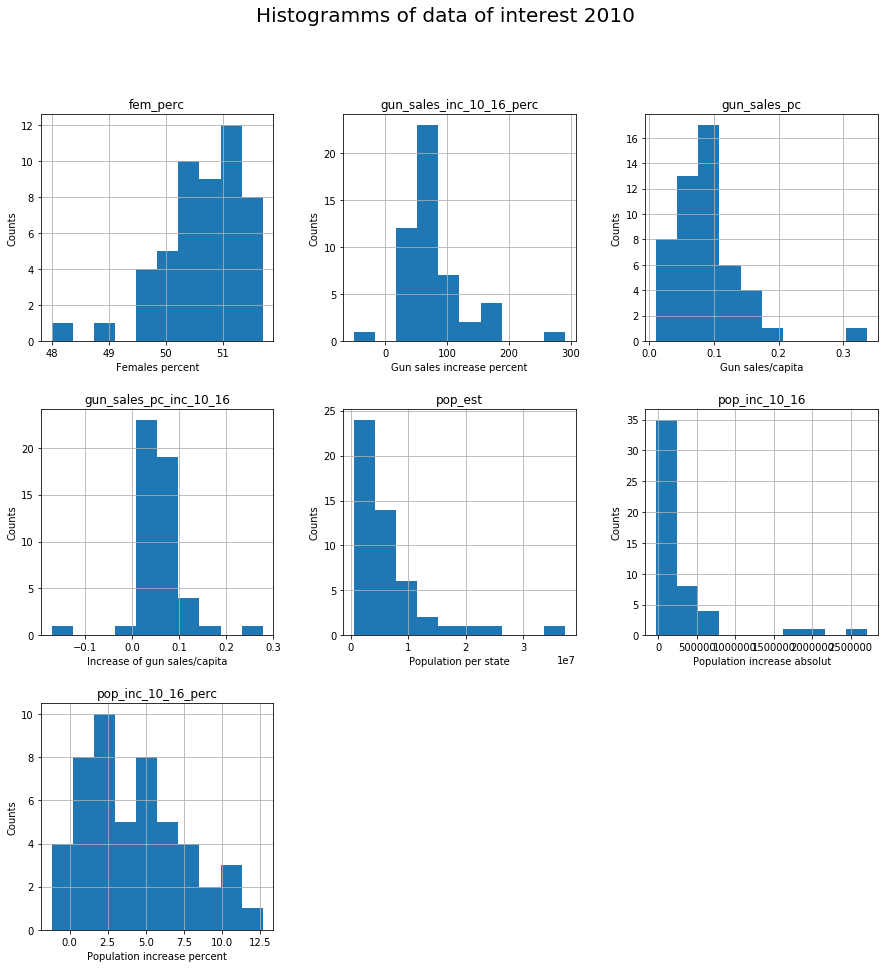

In [170]:
# plot data of interest for 2010 to see distribution, create df with columns of interest
df_2y_merged_col_of_int = df_2y_merged_10_calc.iloc[:, -7:]

# create histograms of data of interest
df_print = df_2y_merged_col_of_int.hist(figsize=(15, 15))
plt.suptitle('Histogramms of data of interest 2010', fontsize=20)
for num, ax in enumerate(df_print.flatten()):
    lista = ['Females percent', 'Gun sales increase percent', 'Gun sales/capita', 'Increase of gun sales/capita', 'Population per state', 'Population increase absolut', 'Population increase percent','','']
    ax.set_xlabel(lista[num])
    ax.set_ylabel('Counts');

In [130]:
# filter 2016 rows 
df_2y_merged_16 = df_2y_merged.query('year == 2016')

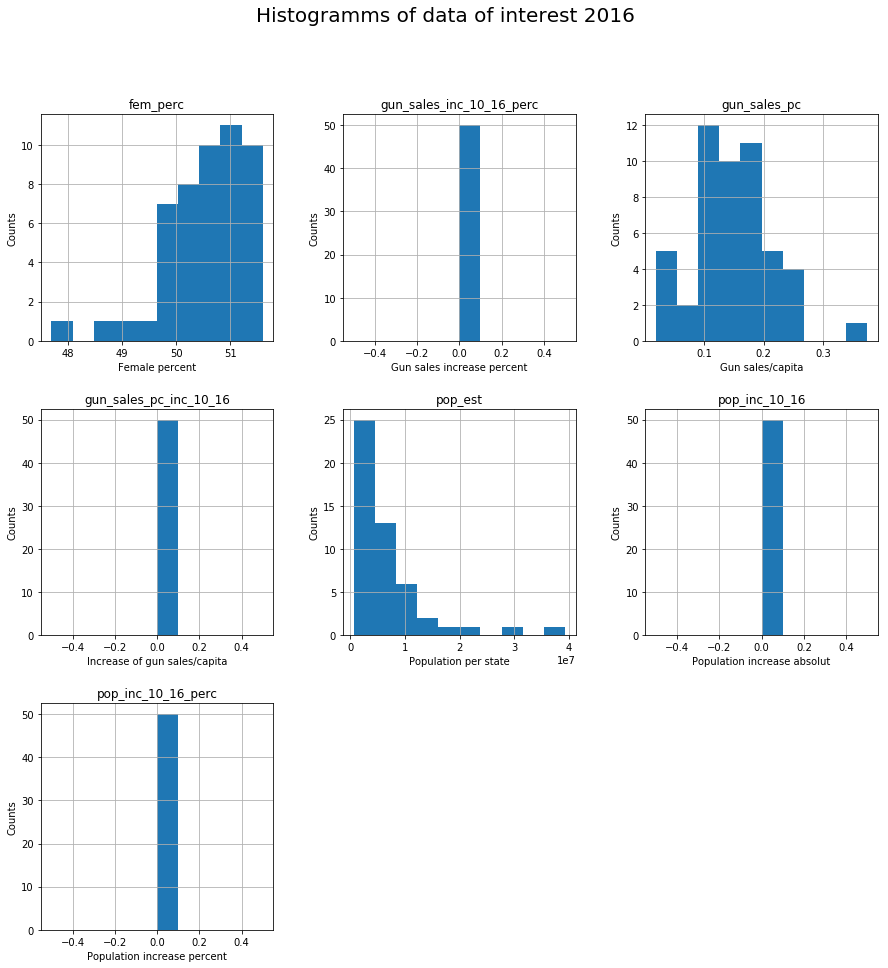

In [171]:
# plot data of interest for 2016 to see distribution, create df with columns of interest
df_2y_merged_col_of_int_1 = df_2y_merged_16.iloc[:, -7:]

# create histograms of data of interest
#df_2y_merged_col_of_int_1.hist(figsize=(15, 15));
df_print1 = df_2y_merged_col_of_int_1.hist(figsize=(15, 15))
plt.suptitle('Histogramms of data of interest 2016', fontsize=20)
for num, ax in enumerate(df_print1.flatten()):
    lista = ['Female percent', 'Gun sales increase percent', 'Gun sales/capita', 'Increase of gun sales/capita', 'Population per state', 'Population increase absolut', 'Population increase percent','','''''']
    ax.set_xlabel(lista[num])
    ax.set_ylabel('Counts');


### Findings 2010-2016 data
> I would have thought that the distribution of the percentage of females in the states would be symmetrically distributed around 50% but these data are left skewed. It seems that females are more than 50% of the inhabitants in the majority of the states. This gets even more pronounced in 2016.

>Gun sales per capita show a clear increase and a shift to the right in the histogram plot in comparison between 2010 and 2016. This is also reflected in gun sales increase in percent in the 2010 hist plot except for a data point that shows a negative growth.

>The rest of the data are not relevant for comparison.

>The 0 only data sets in the 2016 plot are the results from filling NaN values after calculations with 0.

In [132]:
# overview of 2011-2015 data
df_5y_merged

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,owned_houses_perc_11_15,foreign_lang_perc_11_15,ed_high_perc_11_15,ed_bach_perc_11_15,no_health_ins_perc_11_15,med_house_inc_11_15,inc_pc_11_15,pers_poverty_perc_11_15,pop_est_11_15,gun_sales_pc
0,Alabama,112375.600000,0.0,203471.40,193772.04,5716.2,17917.6,0.6,133.32,185.24,...,68.7,5.2,84.3,23.5,10.7,43623,24091,17.1,4821715.5,0.202461
1,Alaska,1610.800000,0.0,38192.00,42924.20,1968.8,4392.8,3.2,77.88,102.08,...,63.4,16.2,92.1,28.0,15.5,72515,33413,9.9,726071.5,0.216042
2,Arizona,53717.000000,0.0,144719.08,106241.08,6367.8,12287.6,0.0,82.50,45.98,...,62.8,26.9,86.0,27.5,11.9,50255,25848,16.4,6661686.0,0.087389
3,Arkansas,47385.200000,0.0,74126.36,95468.78,1440.4,8308.8,288.0,86.24,198.88,...,66.1,7.2,84.8,21.1,9.3,41371,22798,17.2,2952136.5,0.150728
4,California,489575.600000,0.0,453172.94,436154.84,20983.4,0.0,38.6,0.00,0.00,...,54.3,43.9,81.8,31.4,8.3,61818,30318,14.3,38252269.5,0.061199
5,Colorado,47017.200000,0.0,208214.38,181355.24,6830.6,36561.6,3.8,8.36,3.96,...,64.3,16.9,90.7,38.1,8.6,60629,32217,11.0,5284934.5,0.150879
6,Connecticut,127583.600000,0.0,84573.94,57354.44,2385.0,0.0,168.6,0.00,0.00,...,67.0,21.9,89.9,37.6,5.7,70331,38803,9.8,3575283.0,0.126332
7,Delaware,1812.800000,0.0,19616.08,17662.26,663.2,1375.6,1.8,14.30,13.20,...,71.2,12.9,88.4,30.0,6.6,60509,30554,11.7,925000.5,0.074347
8,Florida,114672.400000,0.0,527588.82,305401.36,16705.8,40662.0,3654.4,301.84,165.88,...,65.3,28.1,86.9,27.3,15.3,47507,26829,14.7,19708515.5,0.088107
9,Georgia,147240.400000,0.0,166650.22,141009.66,3347.8,13225.2,0.0,177.98,240.02,...,63.3,13.6,85.4,28.8,14.8,49620,25737,16.0,9999525.5,0.086609


In [133]:
# overview of 2011-2015 data
df_5y_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 38 columns):
state                        50 non-null object
permit                       50 non-null float64
permit_recheck               50 non-null float64
handgun                      50 non-null float64
long_gun                     50 non-null float64
other                        50 non-null float64
multiple                     50 non-null float64
admin                        50 non-null float64
prepawn_handgun              50 non-null float64
prepawn_long_gun             50 non-null float64
prepawn_other                50 non-null float64
redemption_handgun           50 non-null float64
redemption_long_gun          50 non-null float64
redemption_other             50 non-null float64
returned_handgun             50 non-null float64
returned_long_gun            50 non-null float64
returned_other               50 non-null float64
rentals_handgun              50 non-null float64
rentals_long_gun

In [135]:
# plot data of interest for 2011-2015 to see distribution, create df with columns of interest
df_5y_merged_col_of_int = df_5y_merged.iloc[:, np.r_[0, 26:37, 37]]

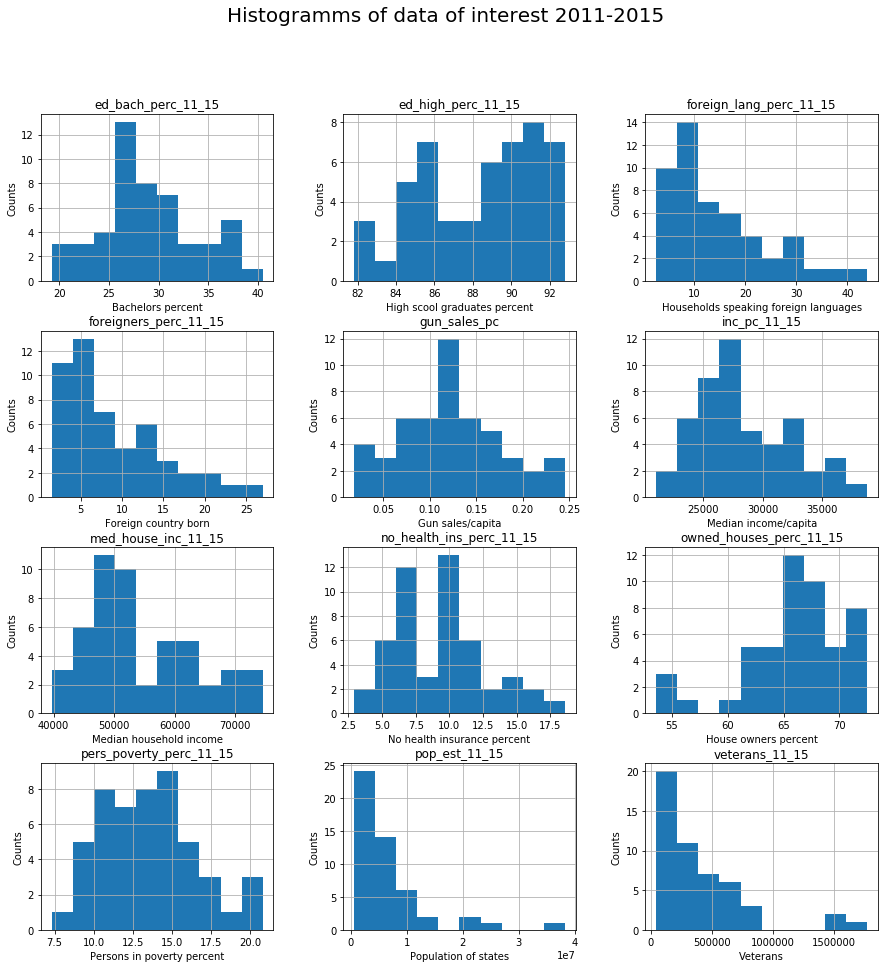

In [167]:
# create histograms of data of interest
df_print2 = df_5y_merged_col_of_int.hist(figsize=(15, 15))
plt.suptitle('Histogramms of data of interest 2011-2015', fontsize=20)
for num, ax in enumerate(df_print2.flatten()):
    lista = ['Bachelors percent', 'High scool graduates percent', 'Households speaking foreign languages', 'Foreign country born', 'Gun sales/capita', 'Median income/capita', 'Median household income','No health insurance percent','House owners percent','Persons in poverty percent', 'Population of states', 'Veterans','']
    ax.set_xlabel(lista[num])
    ax.set_ylabel('Counts');

### Findings for the 2011-2015 data
> A high school education seems to be the norm in the US. Between 82 and 92% of the population hold a high school degree.

> Between 20 and 40% of the population hold a higher education (bachelor or more).

>In some states foreign borne people make up to 25% of inhabitants and in up to 40% of the households a foreign language is spoken.

>There are lots of people without health insurance. In some states up to 18% which is incredible for Austrians who are covered by almost 100% (app. 98%).

>House owners make the majority of the inhabitants from 55 to more than 70%.

>Some persons that live in poverty do seem to have health insurance though because the distributions between these two variables differ which I would not have expected.(More persons in poverty than without health insurance)

> For the 2011-2015 data a symmetric distribution is only given for the gunsales per capita. The rest of the data has either a skewed or a bimodal distribution.


### Research Question 2 : Which US census data from my selection are correlated with gun sales per capita.

**Note**
> In order to explore tis question I create a scatter matrix for my data of interest

In [138]:
# plot data of interest for 2016 to see distribution, create df with columns of interest
df_2y_merged_col_of_int_2 = df_2y_merged.iloc[:, -7:]

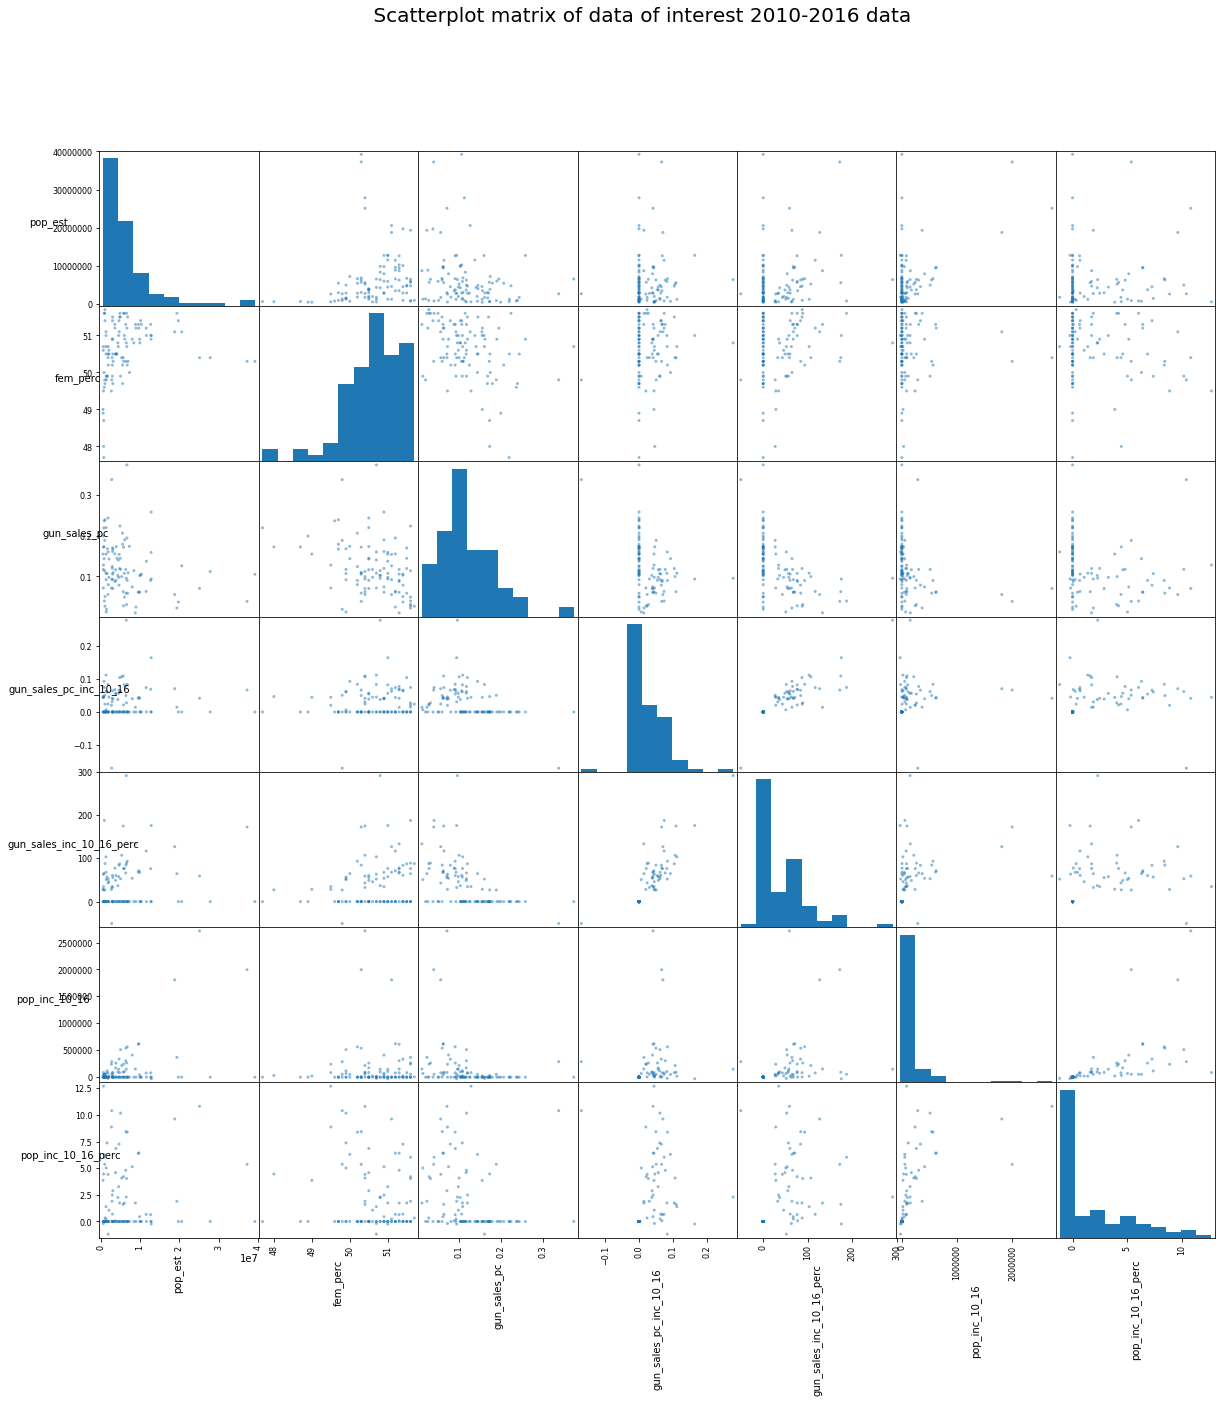

In [172]:
# create scatter matrix for 2010-2016 data to look at females in population as independent variable
scat_mat = pd.plotting.scatter_matrix(df_2y_merged_col_of_int_2, figsize=(20, 20))
plt.suptitle(' Scatterplot matrix of data of interest 2010-2016 data', fontsize=20)
for ax in scat_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0);

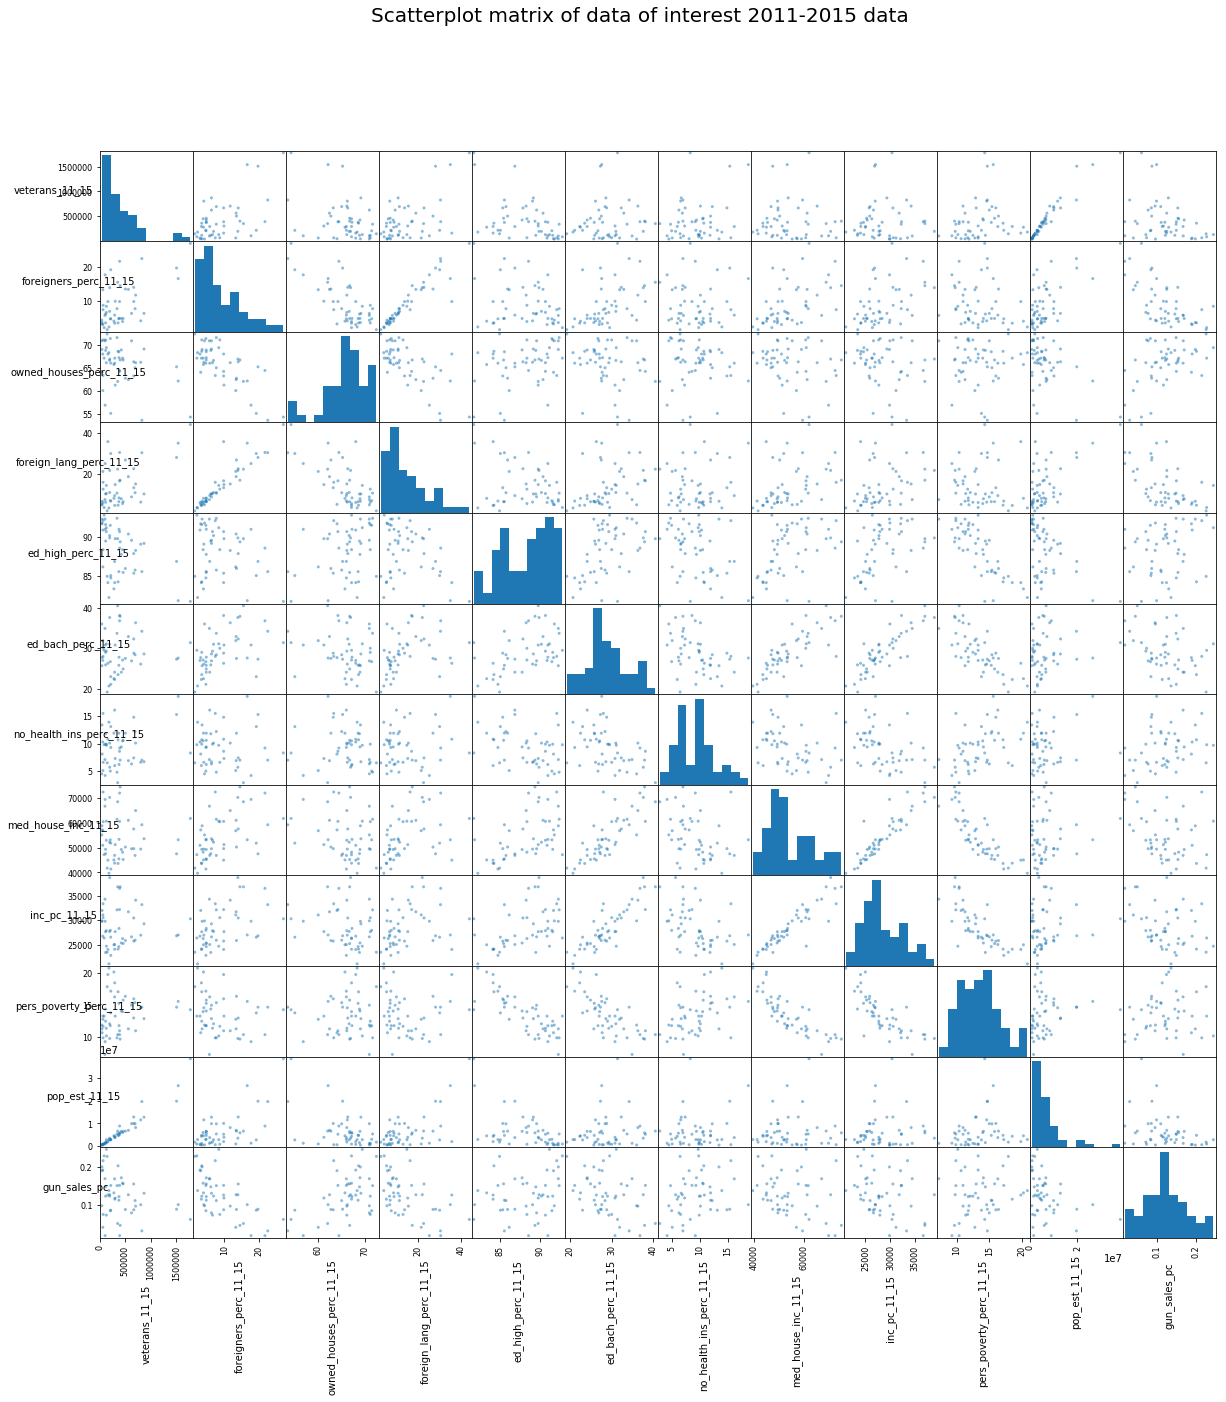

In [173]:
# create scatter matrix to look at foreigners, veterans, house owners, education, wealth as independent variables
scat_mat_1 = pd.plotting.scatter_matrix(df_5y_merged_col_of_int, figsize=(20, 20))
plt.suptitle('Scatterplot matrix of data of interest 2011-2015 data', fontsize=20)
for ax in scat_mat_1.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0);

### Findings

**2010-2016 data**

> The percentage of females in relation to gun sales might have a slight negative correlation. Therefore I will conduct a more in depth analysis of this variable. 

>The straight line of 0 data points result from filling the NaN values after calculations and can be ignored.

**2011-2015 data**

> There is a strong positive correlation between foreign born people and foreign languages spoken in households. So either of these two variables can be used for statistics. 

>There is a strong positive correlation between income per capita and median household income and a strong negative correlation between those two and people in poverty. So these variables can also be seen as interdependent as expected.

>Number of veterans and population estimate numbers show a strong positive correlation. It seems to be that veterans are distributed in number acoording to the general population distribution and not to be clustered for other reasons.

> For veterans and education I cannot detect a correlation with the dependent variable therefore I will not explore these variables further.

> Correlations are found for foreigners, house owners and wealth with the dependent variable. Therefore I will conduct a slightly more in depth analysis for these independent variables.

### Research Question 3 : Which state had the highest gun sales per capita in 2016 ? Which one the lowest?

**Note**
> Create a bar plot to visualize the data

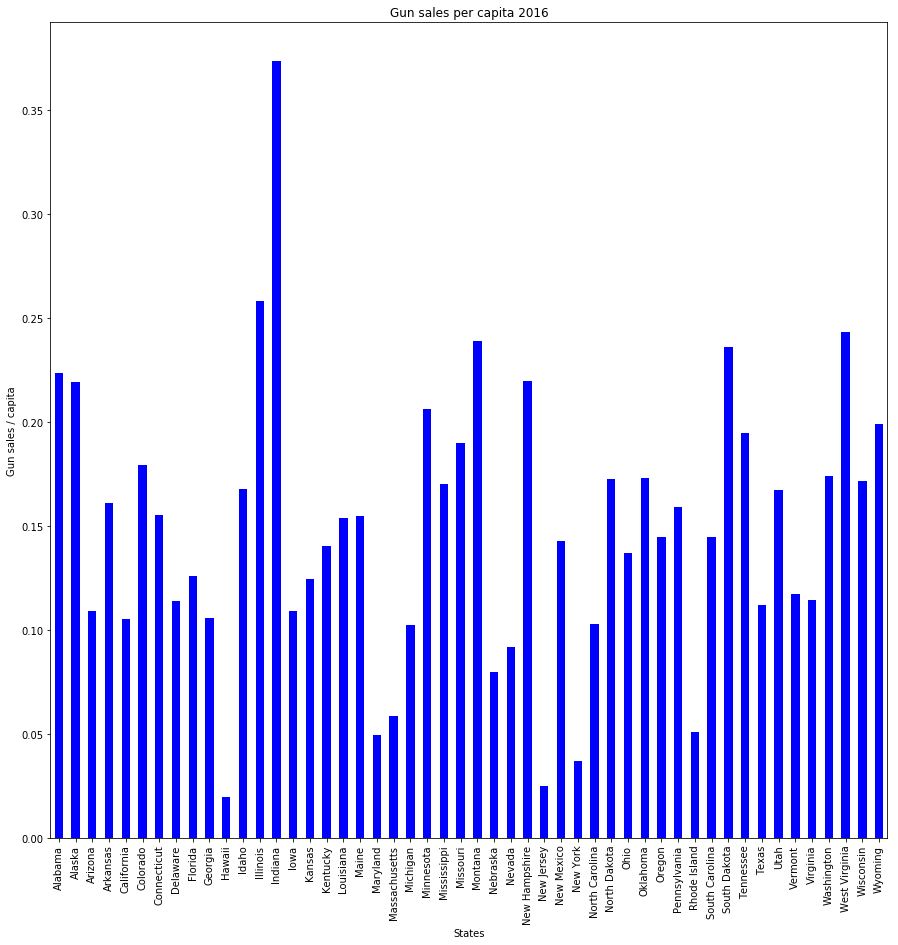

In [142]:
# filter 2016 data
df_2y_merged_16 = df_2y_merged.query('year ==2016')

# create labels and numbers for labelling bar plot correctly
state_name = df_2y_merged_16['state'].values
state_name.reshape(1, 50)
state_name = state_name.tolist()
x_tick_num = np.arange(0,50)

# create plot and label it
df_2y_merged_16['gun_sales_pc'].plot( kind='bar', color='blue', figsize=(15, 15))
plt.xticks(x_tick_num,state_name)
plt.title('Gun sales per capita 2016')
plt.xlabel('States')
plt.ylabel('Gun sales / capita');




In [143]:
# see datails for state with highest gun sales
df_2y_merged[df_2y_merged['state'] == 'Indiana'] 

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16,gun_sales_inc_10_16_perc,pop_inc_10_16,pop_inc_10_16_perc
13,2010,Indiana,105419.0,0.0,123876.5,125895.0,2849.0,8290,0.0,0.0,...,0.0,0.0,619370.0,6484136,50.8,0.095521,0.27789,290.920426,148917.0,2.296636
63,2016,Indiana,946912.0,0.0,306000.2,194939.8,17764.0,18164,90.0,23.1,...,13.2,0.0,2476851.0,6633053,50.7,0.373410,0.00000,0.000000,0.0,0.000000


In [144]:
# see details of state with lowest gun sales
df_2y_merged[df_2y_merged['state'] == 'Hawaii'] 

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16,gun_sales_inc_10_16_perc,pop_inc_10_16,pop_inc_10_16_perc
10,2010,Hawaii,10527.0,0.0,0.0,0.0,0.0,0,6.0,0.0,...,0.0,0.0,17479.0,1360301,49.9,0.012849,0.006537,50.871271,68256.0,5.017713
60,2016,Hawaii,16627.0,0.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,27694.0,1428557,49.8,0.019386,0.000000,0.000000,0.0,0.000000


### Findings

> Kentucky permit holders have to have a check every month therefore inflating numbers, this has to be taken into account and numbers have to be set accordingly (Washington Post, January 4 2016). This can be done in several ways e.g comparing with other states prior to change in law. To stay within the scope of this project I will just go back to the data cleaning section and divide the permit checks for Kentucky by 12 to bring them inline with the rest of the data.

> After readjusting Kentucky figures, Indiana is the state with the highest gun sales per capita and Hawaii the state with the lowest sales per capita. Lots of states with the highest per capita gun sales can be found in the northern part of the US eg. Indiana, Illinois, Montana , West Virginia.Many states with the lowest gun sales per capita can be found on the East Coast and off shore e.g. Hawaii, New York, New Jersey, Rhode Island, Maryland.



### Research Question 4  : Trend of gun sales between 2010 und 2016. Differences between states?

**Note**
> In order to adress this question I will create a bar chart.

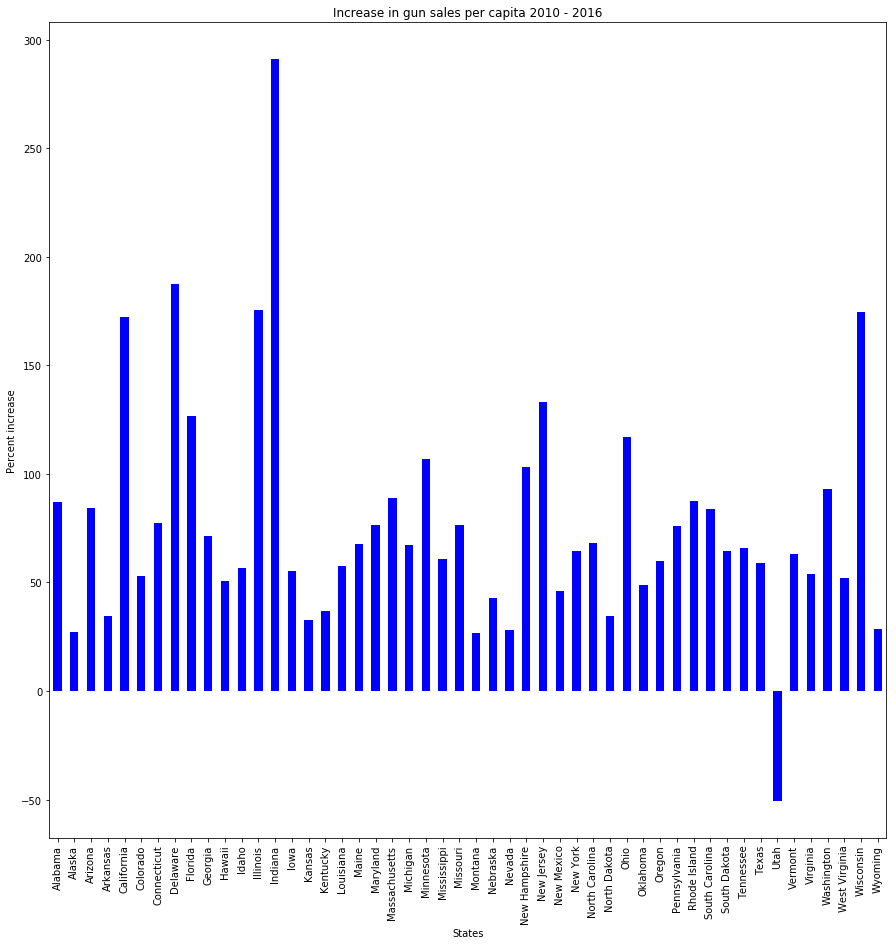

In [145]:
# take only 2010 rows because percent increase data are contained in these rows

df_2y_merged_10_calc['gun_sales_inc_10_16_perc'].plot(kind='bar', color='blue', figsize=(15, 15));
plt.xticks(x_tick_num, state_name)
plt.title('Increase in gun sales per capita 2010 - 2016')
plt.xlabel('States')
plt.ylabel('Percent increase');

In [146]:
# see details for state with highest increase in gun sales
df_2y_merged[df_2y_merged['state'] == 'Indiana'] 

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16,gun_sales_inc_10_16_perc,pop_inc_10_16,pop_inc_10_16_perc
13,2010,Indiana,105419.0,0.0,123876.5,125895.0,2849.0,8290,0.0,0.0,...,0.0,0.0,619370.0,6484136,50.8,0.095521,0.27789,290.920426,148917.0,2.296636
63,2016,Indiana,946912.0,0.0,306000.2,194939.8,17764.0,18164,90.0,23.1,...,13.2,0.0,2476851.0,6633053,50.7,0.373410,0.00000,0.000000,0.0,0.000000


In [147]:
# see details for state with lowest increase in gun sales
df_2y_merged[df_2y_merged['state'] == 'Utah'] 

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,pop_est,fem_perc,gun_sales_pc,gun_sales_pc_inc_10_16,gun_sales_inc_10_16_perc,pop_inc_10_16,pop_inc_10_16_perc
43,2010,Utah,481563.0,0.0,31286.2,45644.5,0.0,3268,0.0,0.0,...,0.0,0.0,932519.0,2763888,49.8,0.337394,-0.170259,-50.46306,287329.0,10.395826
93,2016,Utah,178393.0,266.0,52141.1,59546.3,3514.0,2382,0.0,3.3,...,0.0,0.0,509964.0,3051217,49.7,0.167135,0.000000,0.00000,0.0,0.000000


### Findings
> In general there is a clear trend towards an increase in gun sales within this timeframe. There is one exception which is Utah. In this state gun sales per capita dropped about 50%. I could not find any changes in legislation nor other hints of why that happened doing a brief research in the internet but cannot rule something like that out.Further investigation is beyond the scope of this project. Remarkable is that Utah had already sales in 2010 almost as high as Indiana in 2016. During this time frame estimated gun sales in Indiana increased most, leading to the state with the highest per capita sales in 2016.

> The magnitude of increase is astonishing with 11 states above 100% meaning at least doubling the sales per capita.

>2010 to 2016 B. Obama was president of the US. It is known that during his presidency gun sales increased also because of his effort to restrict gun sales which is somehow a paradoxical intervention. This is inline with the findings in this project.

### Research Question 5  : Are gun sales per capita associated with the proportion of female persons in a state?  Comparison between 2010 and 2016.

> The hypothesis behind this question is that females will have a negative impact on gun sales by influencing males not to buy guns. This kind of female behaviour can be observed in Europe at least.

> The scatterplott in question 2 already showed a slightly negative correlation.

**Note**
> I will adress this question with a scatterplott.

> in order to see if the correlation changed between the years 2010 and 2016 data will be visualized seperately.

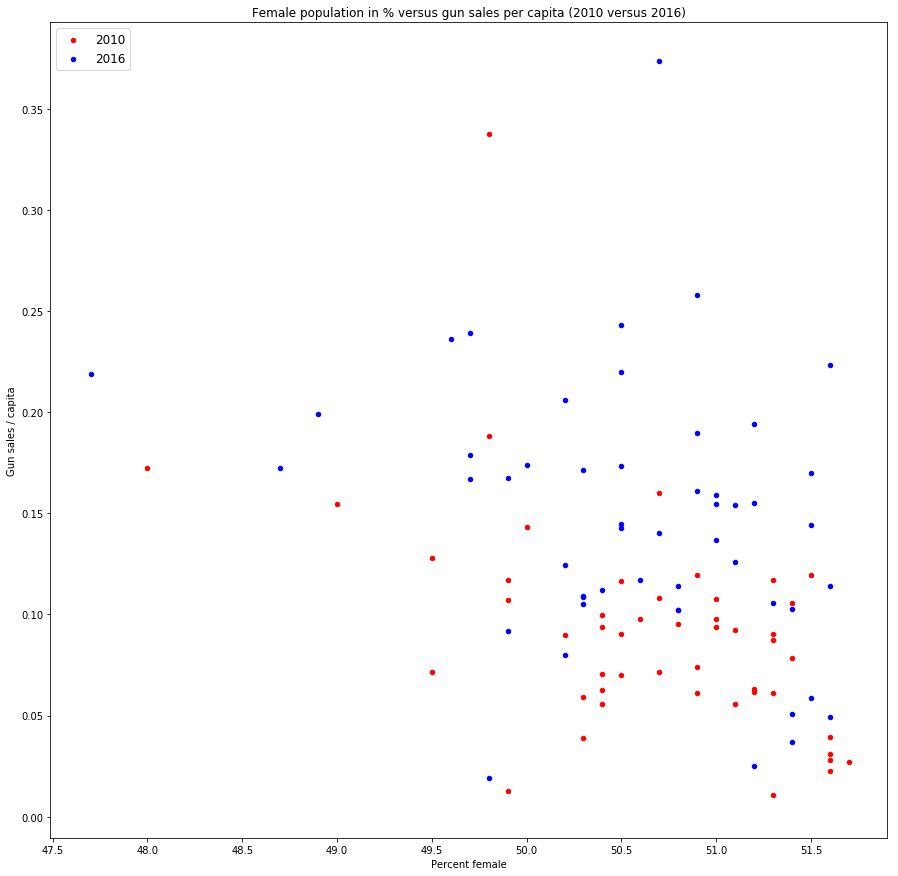

In [148]:
# create scatterplott with 2010 and 2016 data labelled individually
fig, ax = plt.subplots(figsize=(15,15))
colors = {2010:'red', 2016:'blue'}

# group by year to create df to iterate on
grouped = df_2y_merged.groupby('year')
for key, group in grouped:
    group.plot(ax=ax, x='fem_perc', y='gun_sales_pc', kind='scatter', label=key, c=colors[key] )

# add titels
plt.title('Female population in % versus gun sales per capita (2010 versus 2016)')
plt.xlabel('Percent female')
plt.ylabel('Gun sales / capita')
plt.legend(loc='upper left', fontsize=12);






In [149]:
# calculate correlation for complete data set
df_2y_merged['fem_perc'].corr(df_2y_merged['gun_sales_pc'])

-0.36668442609193147

In [150]:
# create df with 2010 data
df_2y_merged_10 = df_2y_merged.iloc[:50, :]

# create df with 2016 data
df_2y_merged_16 = df_2y_merged.iloc[50:, :]

# calculate correlation for 2010 data
df_2y_merged_10['fem_perc'].corr(df_2y_merged_10['gun_sales_pc'])

-0.49511444795843845

In [151]:
# calculate correlation for 2016
df_2y_merged_16['fem_perc'].corr(df_2y_merged_16['gun_sales_pc'])

-0.29040316410051092

### Findings
> It looks like that in 2010 there is a negative correlation between the percentage of the female population and the gun sales per capita i.e. more female citizens mean less gun sales. This correlation seems to have vanished in 2016. A further elaboration of this question is beyond the scope of the project.

> The assumptions made from purely looking at the scatterplot are not validated by calculating the correlation. Although it's a negative correlation as expected the magnitude is too low to draw any meaningful conclusion. So there does not seem to be a big influence from females on the number of gun sales in this data.

### Research Question 6  :  Are gun sales per capita associated with the proportion of veterans in a state.2011-2015 data

> The hypothesis is that veterans are living in non wealthy conservative regions and also influencing their environment. The correlation should be positive.

> The scatterplot in question 2 shows no correlation so this question is not investigated further. Furthermore, there is a strong positive correlation between number of veterans and population size within states meaning that the number of veterans varies with population size and is not influenced by other socioeconomic factors.

### Research Question 7  :  Are gun sales associated with the proportion of foreign born persons. 2011-2015 data

> The hypothesis in this case would be that foreigners with a different attitude towards guns don't buy and/or influence their neighborhood or that they are an indicator for a liberal (e.g. urban) environment because in general foreigners tend to live in cities rather than rural areas. The correlation should be negative then.

> The scatterplot in question 2 shows a negative correlation for foreign persons as well as foreign language spoken.

**Note**
> I will adress this question with a scatter plot.

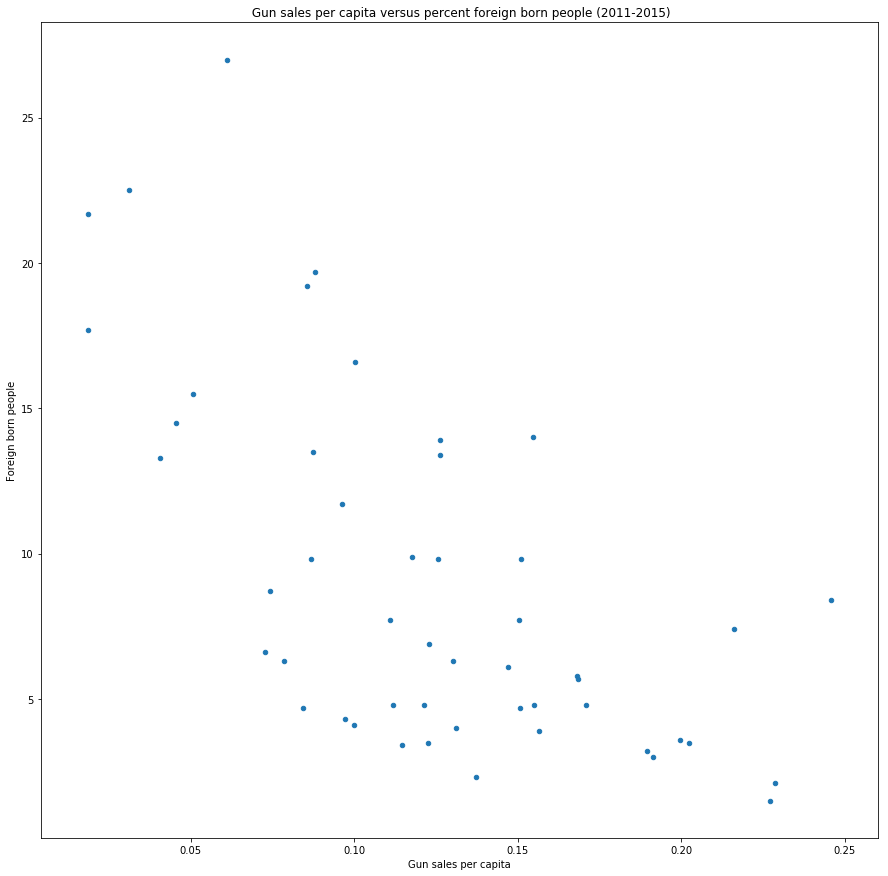

In [152]:
# create scatter plot for data visualization for percent foreigners in a state
df_5y_merged.plot(x='gun_sales_pc', y='foreigners_perc_11_15', kind='scatter', figsize=(15, 15))
plt.title(' Gun sales per capita versus percent foreign born people (2011-2015)')
plt.xlabel('Gun sales per capita')
plt.ylabel('Foreign born people');

In [153]:
# calculate correlation
df_5y_merged['gun_sales_pc'].corr(df_5y_merged['foreigners_perc_11_15'])

-0.64648902597727731

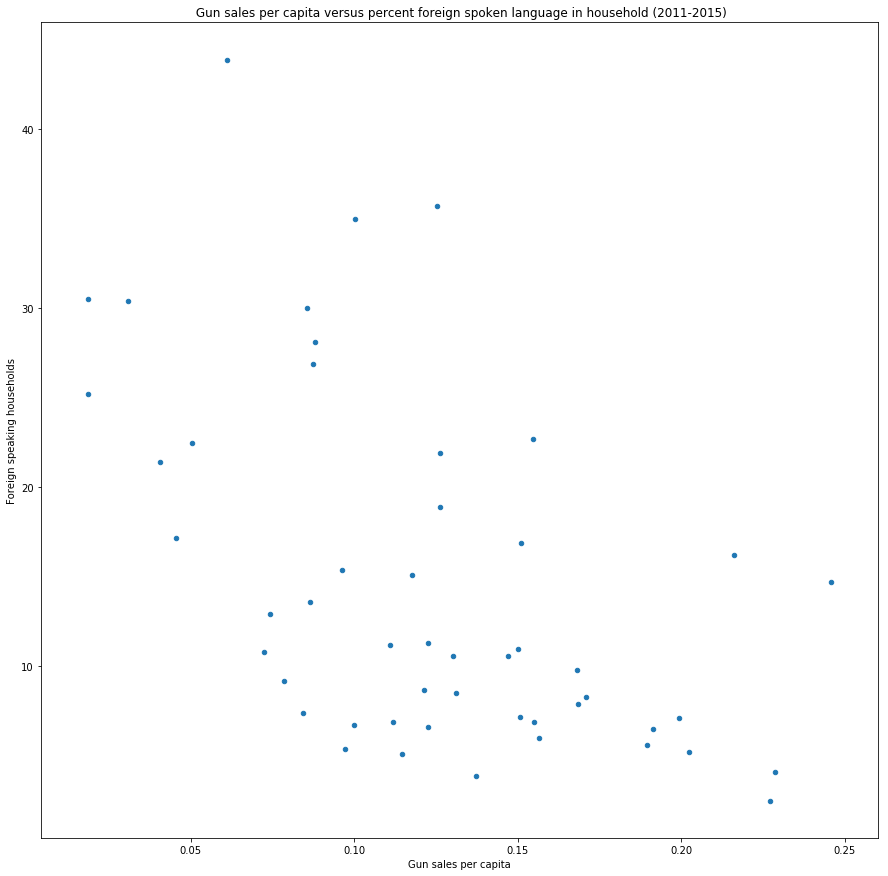

In [154]:
# create scatter plot for data visualization for foreign spoken language in household in a state
df_5y_merged.plot(x='gun_sales_pc', y='foreign_lang_perc_11_15', kind='scatter', figsize=(15, 15))
plt.title(' Gun sales per capita versus percent foreign spoken language in household (2011-2015)')
plt.xlabel('Gun sales per capita')
plt.ylabel('Foreign speaking households');

In [155]:
# calculate correlation
df_5y_merged['gun_sales_pc'].corr(df_5y_merged['foreign_lang_perc_11_15'])

-0.5336140228413021

**Note**
> I will investigate if this correlation gets stronger by comparing the quartiles of the variables.

In [156]:
# description of the per capita gun sales data
df_5y_merged['gun_sales_pc'].describe()

count    50.000000
mean      0.123739
std       0.055029
min       0.018466
25%       0.086804
50%       0.122610
75%       0.154863
max       0.245819
Name: gun_sales_pc, dtype: float64

In [157]:
# description of the foreign language data
df_5y_merged['foreign_lang_perc_11_15'].describe()

count    50.00000
mean     14.52200
std       9.81873
min       2.50000
25%       6.95000
50%      10.90000
75%      20.77500
max      43.90000
Name: foreign_lang_perc_11_15, dtype: float64

In [158]:
# creating labels for the quartile data

# bin edges for the gun sales per capita
bin_edges = [0.018, 0.086, 0.122, 0.154, 0.246]

# bin names
bin_names = ['low', 'medium', 'medium_high', 'high']

# creating data frame with new column
df_5y_merged['ordinal_gun_sales'] = pd.cut(df_5y_merged['gun_sales_pc'], bin_edges, labels=bin_names)

# group data frame for gun sales
df_5y_group_sales = df_5y_merged.groupby('ordinal_gun_sales')['gun_sales_pc'].mean()

# inspect data
df_5y_group_sales

ordinal_gun_sales
low            0.055056
medium         0.102636
medium_high    0.135038
high           0.191012
Name: gun_sales_pc, dtype: float64

In [159]:
# group data frame for foreigners
df_5y_group_foreign = df_5y_merged.groupby('ordinal_gun_sales')['foreigners_perc_11_15'].mean()

# inspect data
df_5y_group_foreign

ordinal_gun_sales
low            14.808333
medium          9.191667
medium_high     7.366667
high            5.121429
Name: foreigners_perc_11_15, dtype: float64

In [160]:
# calculate correlation 
df_5y_group_sales.corr(df_5y_group_foreign)

-0.96002201134500054

### Findings

> This correlation might show that  the presence of foreigners might have an influence on gun sales or what is more plausible to my opinion that foreigners who would rather be found in urban areas are an indicator for more liberal spaces in the US where obviously gun sales are less common than in rural and remote areas although until now it is only a correlation. The causation is speculative.

### Research Question 8  :  Are gun sales associated with the proportion of owner occupied housing unit rate. 2011-2015 data

> The hypothesis would be that there is a positive correlation with gun sales as people want to defend their property.

> The scatterplot in question 2 shows a positive correlation. Therefore I will explore the question in more detail.

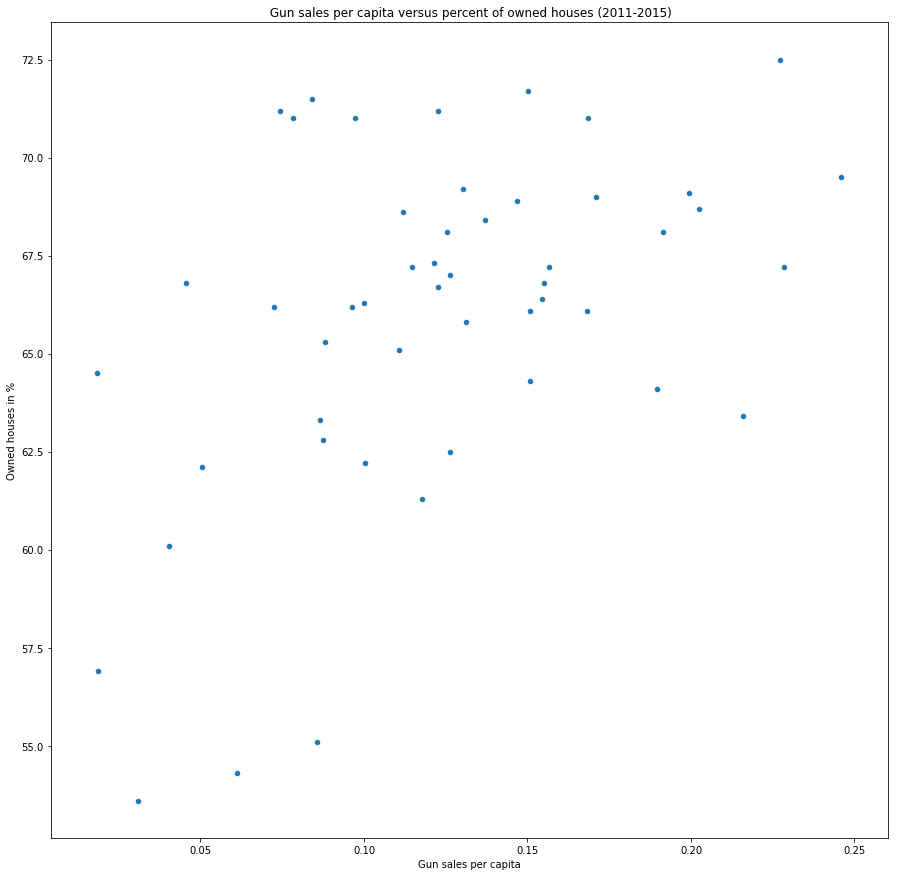

In [161]:
df_5y_merged.plot(x='gun_sales_pc', y='owned_houses_perc_11_15', kind='scatter', figsize=(15, 15))
plt.title(' Gun sales per capita versus percent of owned houses (2011-2015)')
plt.xlabel('Gun sales per capita')
plt.ylabel('Owned houses in %');

In [162]:
df_5y_merged['gun_sales_pc'].corr(df_5y_merged['owned_houses_perc_11_15'])

0.48180707544645068

### Findings
> There is some trend to be seen here. This variable could be one that is further explored if one wants to dive into inferential statistics.

> Like in question 7 this variable might also be an indicator for rural areas where the proportion of house owners will be greater than in urban areas and therefore the variable might be an indicator for a certain socioeconomic environment. Also here only a correlation is found and no causality.

### Research Question 9  :  Are gun sales associated with education. High scool graduate or higher. 2011-2015 data

> The hypothesis is that higher education correlates with less affinity to guns. Therefore a negative correlation would be expected.

> The scatterplot in question 2 shows no correlation with the education variables. Therefore no further exploration is done.

### Research Question 10  :  Are gun sales associated with wealth. Median household income/Per capita income/Persons in poverty. 2011-2015 data

> The hypothesis is that wealth plays a role in buying guns. Whether it is positive or negative I don't know. Wealth could be an indicator per se or like foreigner a hint towards a more wealthy and therefore more liberal and urban environment. In this case the correlation should be negative.

> The scatterplott in question 2 shows a negative correlation between gun sales and the per capita income. Therefore this variable will be explored further.

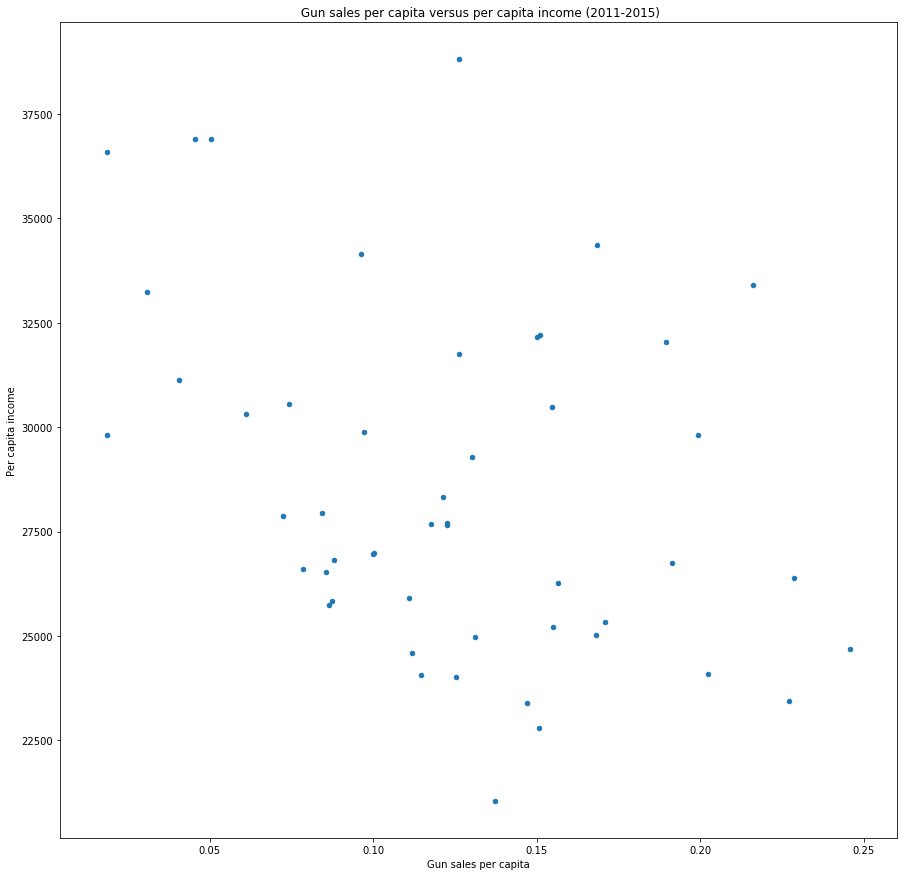

In [163]:
df_5y_merged.plot(x='gun_sales_pc', y='inc_pc_11_15', kind='scatter', figsize=(15, 15))
plt.title(' Gun sales per capita versus per capita income (2011-2015)')
plt.xlabel('Gun sales per capita')
plt.ylabel('Per capita income');

In [143]:
df_5y_merged['gun_sales_pc'].corr(df_5y_merged['inc_pc_11_15'])

-0.3495411466659078

### Findings
> Like for the percentage of females the correlation is too weak in order to explore this variable further.

## Conclusions
> There is a clear trend towards higher gun sales per capita between 2010 and 2016. This increase is a result of higher sales and not a decrease of the population. From the statistics above it can be seen that the population increased as well although only a fraction of the gun sales increase.

> The independent variables from the set that I have chosen that could be further investigated for e.g. inferential statistics are foreign borne people or households with foreign languages spoken and the percentage of house owners. Whether these variables are predictive for themselves or just an indicator for other features influencing gun sales cannot be determined so far. My personal guess would be the latter i.e. that they are indicators for specific environments that have a positive or negative influence on gun sales.

>From the correlation of these independent variables with the dependent variable I would draw the hypothesis that the difference of the gun sales per capita within the US states might be associated with socioeconomic factors. It might be that a rural and therefore more conservative environment has a positive effect on gun sales and an urban and therefore more liberal environment has a negative impact on gun sales. This can be also seen to some degree in the distribution of gun sales per capita in 2016. This hypothesis can be further investigated in depth.

> The rest of my independent variables are not correlated enough with gun sales per capita in order to explore them further. Some outcomes of these variables were surprising to me like an only minor influence of females. This could be a result of the very narrow distribution of the percentage of females between states.

> Interesting though is the difference between the percentage of femals variable between 2010 and 2016. In 2010 this variable might have had more influence on gun sales than in 2016. Interestingly I found some hints in the internet that a lot of the gun sales increase in the last years can be attributed to female buyers.

> There are lots of other socioeconomic variables that I did not adress in this project. These can be investigated further if one is interested in the factors associated with gun sales per capita.

> Limitations: The gun sales calculation out of the backgroundchecks is only an approximation. The rearrangement of the Kentucky data (monthly permit checks overinflating the gun sales data) is only an approximation. I used only visualization and descriptive statistics. The independent variables were chosen upfront according to my interest and not upon investigation of the variables. The population estimate for the 2011-2015 data are the average of the 2010 and 2016 data.


Make it ready for Git hub

In [174]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0